In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import netCDF4 as nc
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from skimage.measure import block_reduce
import sys
sys.path.insert(0,'..')
from dataloader import DataLoaderDALES
from functions import vint, getRad
import seaborn as sns

# Plot font size settings
small_font = 13
mediu_font = 14
large_font = 16

def update_fontsizes(small_font, mediu_font, large_font):
    plt.rc('font', size = small_font)
    plt.rc('axes', titlesize = small_font)
    plt.rc('axes', labelsize = mediu_font)
    plt.rc('axes', titlesize = large_font)
    plt.rc('xtick', labelsize = small_font)
    plt.rc('ytick', labelsize = small_font)
    plt.rc('legend', fontsize = small_font)
    plt.rc('figure', titlesize = large_font)

update_fontsizes(small_font, mediu_font, large_font)
    
# Run specifics
lp = '/Users/martinjanssens/Documents/Wageningen/Patterns-in-satellite-images/BOMEXStability/bomex200_e12/ppagg_wqtfixed'
sp = lp+'/../figs'

dl = DataLoaderDALES(lp+'/..')
try:
    ds2d = nc.Dataset(lp+'/../cape2d.001.nc')
except:
    print('No 2D DALES output found, plots that require cth will not work...')

time1d = dl.time1d
rhobf = dl.rhobf

# Larger-scale processes
zf_inp = dl.zf_inp
wfls = dl.wfls
dqdt_ls = dl.dqdt_ls
dthldt_ls = dl.dthldt_ls

time = np.load(lp+'/time.npy')
plttime = np.load(lp+'/plttime.npy')
zflim = np.load(lp+'/zf.npy')

dzh = np.diff(zflim)[0] # FIXME only valid in lower part of domain

izmin = np.where(zflim[0] == zf_inp)[0][0]
izmax = np.where(zflim[-1] == zf_inp)[0][0]+1

qtpf_moist_time = np.load(lp+'/qtpf_moist_time.npy')
qtpf_dry_time = np.load(lp+'/qtpf_dry_time.npy')
qtpf_prod_moist_time = np.load(lp+'/qtpf_prod_moist_time.npy')
qtpf_prod_dry_time = np.load(lp+'/qtpf_prod_dry_time.npy')
qtpf_prod_moist_wex_time = np.load(lp+'/qtpf_prod_moist_wex_time.npy')
qtpf_prod_dry_wex_time = np.load(lp+'/qtpf_prod_dry_wex_time.npy')
qtpf_vdiv_moist_time = np.load(lp+'/qtpf_vdiv_moist_time.npy')
qtpf_vdiv_dry_time = np.load(lp+'/qtpf_vdiv_dry_time.npy')
qtpf_hdiv_moist_time = np.load(lp+'/qtpf_hdiv_moist_time.npy')
qtpf_hdiv_dry_time = np.load(lp+'/qtpf_hdiv_dry_time.npy')
qtpf_subs_moist_time = np.load(lp+'/qtpf_subs_moist_time.npy')
qtpf_subs_dry_time = np.load(lp+'/qtpf_subs_dry_time.npy')
qtpf_diff_moist_time = np.load(lp+'/qtpf_diff_moist_time.npy')
qtpf_diff_dry_time = np.load(lp+'/qtpf_diff_dry_time.npy')

thlvpf_moist_time = np.load(lp+'/thlvpf_moist_time.npy')
thlvpf_dry_time = np.load(lp+'/thlvpf_dry_time.npy')
thlvpf_prod_moist_time = np.load(lp+'/thlvpf_prod_moist_time.npy')
thlvpf_prod_dry_time = np.load(lp+'/thlvpf_prod_dry_time.npy')
thlvpf_vdiv_moist_time = np.load(lp+'/thlvpf_vdiv_moist_time.npy')
thlvpf_vdiv_dry_time = np.load(lp+'/thlvpf_vdiv_dry_time.npy')
thlvpf_hdiv_moist_time = np.load(lp+'/thlvpf_hdiv_moist_time.npy')
thlvpf_hdiv_dry_time = np.load(lp+'/thlvpf_hdiv_dry_time.npy')
thlvpf_subs_moist_time = np.load(lp+'/thlvpf_subs_moist_time.npy')
thlvpf_subs_dry_time = np.load(lp+'/thlvpf_subs_dry_time.npy')
thlvpf_diff_moist_time = np.load(lp+'/thlvpf_diff_moist_time.npy')
thlvpf_diff_dry_time = np.load(lp+'/thlvpf_diff_dry_time.npy')

thlvpp_moist_time = np.load(lp+'/thlvpp_moist_time.npy')
thlvpp_dry_time = np.load(lp+'/thlvpp_dry_time.npy')
thlvpp_prod_moist_time = np.load(lp+'/thlvpp_prod_moist_time.npy')
thlvpp_prod_dry_time = np.load(lp+'/thlvpp_prod_dry_time.npy')
thlvpp_vdiv_moist_time = np.load(lp+'/thlvpp_vdiv_moist_time.npy')
thlvpp_vdiv_dry_time = np.load(lp+'/thlvpp_vdiv_dry_time.npy')
thlvpp_hdiv_moist_time = np.load(lp+'/thlvpp_hdiv_moist_time.npy')
thlvpp_hdiv_dry_time = np.load(lp+'/thlvpp_hdiv_dry_time.npy')
thlvpp_subs_moist_time = np.load(lp+'/thlvpp_subs_moist_time.npy')
thlvpp_subs_dry_time = np.load(lp+'/thlvpp_subs_dry_time.npy')
thlvpp_diff_moist_time = np.load(lp+'/thlvpp_diff_moist_time.npy')
thlvpp_diff_dry_time = np.load(lp+'/thlvpp_diff_dry_time.npy')

wthlvpf_prod_moist_time = np.load(lp+'/wthlvpf_prod_moist_time.npy')
wthlvpf_prod_dry_time =  np.load(lp+'/wthlvpf_prod_dry_time.npy')
wthlvpf_vdiv_moist_time =  np.load(lp+'/wthlvpf_vdiv_moist_time.npy')
wthlvpf_vdiv_dry_time = np.load(lp+'/wthlvpf_vdiv_dry_time.npy')
wthlvpf_hdiv_moist_time = np.load(lp+'/wthlvpf_hdiv_moist_time.npy')
wthlvpf_hdiv_dry_time = np.load(lp+'/wthlvpf_hdiv_dry_time.npy')
wthlvpf_buoy_moist_time = np.load(lp+'/wthlvpf_buoy_moist_time.npy')
wthlvpf_buoy_dry_time = np.load(lp+'/wthlvpf_buoy_dry_time.npy')
wthlvpf_pres_moist_time = np.load(lp+'/wthlvpf_pres_moist_time.npy')
wthlvpf_pres_dry_time = np.load(lp+'/wthlvpf_pres_dry_time.npy')
wthlvpf_subs_moist_time = np.load(lp+'/wthlvpf_subs_moist_time.npy')
wthlvpf_subs_dry_time = np.load(lp+'/wthlvpf_subs_dry_time.npy')
wthlvpf_diff_moist_time = np.load(lp+'/wthlvpf_diff_moist_time.npy')
wthlvpf_diff_dry_time = np.load(lp+'/wthlvpf_diff_dry_time.npy')

qlpf_moist_time = np.load(lp+'/qlpf_moist_time.npy') 
qlpf_dry_time = np.load(lp+'/qlpf_dry_time.npy')
qlpf_prod_moist_time = np.load(lp+'/qlpf_prod_moist_time.npy')
qlpf_prod_dry_time = np.load(lp+'/qlpf_prod_dry_time.npy')
qlpf_vdiv_moist_time = np.load(lp+'/qlpf_vdiv_moist_time.npy')
qlpf_vdiv_dry_time = np.load(lp+'/qlpf_vdiv_dry_time.npy')
qlpf_hdiv_moist_time = np.load(lp+'/qlpf_hdiv_moist_time.npy')
qlpf_hdiv_dry_time = np.load(lp+'/qlpf_hdiv_dry_time.npy')
qlpf_subs_moist_time = np.load(lp+'/qlpf_subs_moist_time.npy')
qlpf_subs_dry_time = np.load(lp+'/qlpf_subs_dry_time.npy')
qlpf_diff_moist_time = np.load(lp+'/qlpf_diff_moist_time.npy')
qlpf_diff_dry_time = np.load(lp+'/qlpf_diff_dry_time.npy')

thl_av_time = np.load(lp+'/thl_av_time.npy')
thlv_av_time = np.load(lp+'/thlv_av_time.npy')
qt_av_time = np.load(lp+'/qt_av_time.npy')

thlpf_moist_time = np.load(lp+'/thlpf_moist_time.npy')
thlpf_dry_time = np.load(lp+'/thlpf_dry_time.npy')
wff_moist_time = np.load(lp+'/wff_moist_time.npy')
wff_dry_time = np.load(lp+'/wff_dry_time.npy')

thlpp_moist_time = np.load(lp+'/thlpp_moist_time.npy')
thlpp_dry_time = np.load(lp+'/thlpp_dry_time.npy')
wfp_moist_time = np.load(lp+'/wfp_moist_time.npy')
wfp_dry_time = np.load(lp+'/wfp_dry_time.npy')
qlpp_moist_time = np.load(lp+'/qlpp_moist_time.npy') 
qlpp_dry_time = np.load(lp+'/qlpp_dry_time.npy')

wthlp_av_time = np.load(lp+'/wthlp_av_time.npy')
wthlpf_moist_time = np.load(lp+'/wthlpf_moist_time.npy')
wthlpf_dry_time = np.load(lp+'/wthlpf_dry_time.npy')

wqtp_av_time = np.load(lp+'/wqtp_av_time.npy')
wqtpf_moist_time = np.load(lp+'/wqtpf_moist_time.npy')
wqtpf_dry_time = np.load(lp+'/wqtpf_dry_time.npy')

wqlp_av_time = np.load(lp+'/wqlp_av_time.npy')
wqlpf_moist_time = np.load(lp+'/wqlpf_moist_time.npy')
wqlpf_dry_time = np.load(lp+'/wqlpf_dry_time.npy')
wqlpf_l_moist_time = np.load(lp+'/wqlpf_l_moist_time.npy')
wqlpf_l_dry_time = np.load(lp+'/wqlpf_l_dry_time.npy')
wqlpf_c_moist_time = np.load(lp+'/wqlpf_c_moist_time.npy')
wqlpf_c_dry_time = np.load(lp+'/wqlpf_c_dry_time.npy')
wqlpf_r_moist_time = np.load(lp+'/wqlpf_r_moist_time.npy')
wqlpf_r_dry_time = np.load(lp+'/wqlpf_r_dry_time.npy')

wthlvp_av_time = np.load(lp+'/wthlvp_av_time.npy')
wthlvpf_moist_time = np.load(lp+'/wthlvpf_moist_time.npy')
wthlvpf_dry_time = np.load(lp+'/wthlvpf_dry_time.npy')
wthlvpf_l_moist_time = np.load(lp+'/wthlvpf_l_moist_time.npy')
wthlvpf_l_dry_time = np.load(lp+'/wthlvpf_l_dry_time.npy')
wthlvpf_c_moist_time = np.load(lp+'/wthlvpf_c_moist_time.npy')
wthlvpf_c_dry_time = np.load(lp+'/wthlvpf_c_dry_time.npy')
wthlvpf_r_moist_time = np.load(lp+'/wthlvpf_r_moist_time.npy')
wthlvpf_r_dry_time = np.load(lp+'/wthlvpf_r_dry_time.npy')
wthlvpp_moist_time = np.load(lp+'/wthlvpp_moist_time.npy')
wthlvpp_dry_time = np.load(lp+'/wthlvpp_dry_time.npy')

# Flux anomaly
wthlvpf_moist_anom = wthlvpf_moist_time - wthlvp_av_time
wthlvpf_dry_anom = wthlvpf_dry_time - wthlvp_av_time

# Buoyancy approximation
thvpf_moist_time = thlvpf_moist_time + 7*thl_av_time*qlpf_moist_time
thvpf_dry_time = thlvpf_dry_time + 7*thl_av_time*qlpf_dry_time

# Mean ql (we don't have this from stats3d)
ql_av_1d = dl.load_qlav(izmin, izmax)
ql_interp = interp1d(time1d/3600,ql_av_1d,axis=0)
ql_av_time = ql_interp(time)

# Reference pressure and constants
pref_1d = dl.load_presh(0,izmin, izmax+1)
pref_1d = (pref_1d[1:] + pref_1d[:-1])*0.5
exnf = (pref_1d/1e5)**(2./7.)
Lv = 2.5e6
cp = 1004

# Slopes of mean profiles
Gamma_thlv = thlvpf_prod_moist_time/wff_moist_time[:,1:-1]
Gamma_qt = qtpf_prod_moist_wex_time/wff_moist_time[:,1:-1]

# Tendencies of variables of interest
def tderive(var,time):
    return ((var[1:,1:-1] - var[:-1,1:-1])
           /(time[1:,np.newaxis] - time[:-1,np.newaxis])/3600)


qtpf_tend_moist_time = np.zeros(qtpf_prod_moist_time.shape)
qtpf_tend_dry_time = np.zeros(qtpf_prod_moist_time.shape)
qtpf_tend_moist_time[1:,:] = tderive(qtpf_moist_time, time)
qtpf_tend_dry_time[1:,:] = tderive(qtpf_dry_time, time)

thlvpf_tend_moist_time = np.zeros(thlvpf_prod_moist_time.shape)
thlvpf_tend_dry_time = np.zeros(thlvpf_prod_moist_time.shape)
thlvpf_tend_moist_time[1:,:] = tderive(thlvpf_moist_time, time)
thlvpf_tend_dry_time[1:,:] = tderive(thlvpf_dry_time, time)

wthlvpf_tend_moist_time = np.zeros(wthlvpf_prod_moist_time.shape)
wthlvpf_tend_dry_time = np.zeros(wthlvpf_prod_moist_time.shape)
wthlvpf_tend_moist_time[1:,:] = tderive(wthlvpf_moist_anom, time)
wthlvpf_tend_dry_time[1:,:] = tderive(wthlvpf_dry_anom, time)


## Reconstruct slab-mean budget terms

thl_av_1d = dl.load_thlav(izmin, izmax)
qt_av_1d = dl.load_qtav(izmin, izmax)
thlv_av_1d = thl_av_1d*(1 + 0.608*qt_av_1d)

# Tendencies
ddt_thl_av_time = tderive(thl_av_1d, time1d/3600)
ddt_thlv_av_time = tderive(thlv_av_1d, time1d/3600)
ddt_qt_av_time = tderive(qt_av_1d, time1d/3600)
ddt_ql_av_time = tderive(ql_av_1d, time1d/3600)

# Flux divergence (approximately, i.e. ignoring rho)
wthl_av = dl.load_wthlav(izmin, izmax)
wqt_av = dl.load_wqtav(izmin, izmax)
wql_av = dl.load_wqlav(izmin, izmax)
wthlv_av = wthl_av + 0.608*thl_av_1d*wqt_av

ddz_wthl_av_time = ((wthl_av[:,1:] - wthl_av[:,:-1])/dzh)
ddz_wthlv_av_time = ((wthlv_av[:,1:] - wthlv_av[:,:-1])/dzh)
ddz_wqt_av_time = ((wqt_av[:,1:] - wqt_av[:,:-1])/dzh)
ddz_wql_av_time = ((wql_av[:,1:] - wql_av[:,:-1])/dzh)

ddz_wthl_av_time = (ddz_wthl_av_time[:,1:] + ddz_wthl_av_time[:,:-1])*0.5
ddz_wthlv_av_time = (ddz_wthlv_av_time[:,1:] + ddz_wthlv_av_time[:,:-1])*0.5
ddz_wqt_av_time = (ddz_wqt_av_time[:,1:] + ddz_wqt_av_time[:,:-1])*0.5
ddz_wql_av_time = (ddz_wql_av_time[:,1:] + ddz_wql_av_time[:,:-1])*0.5

# Subsidence
Gamma_thl_1d = (thl_av_1d[:,1:] - thl_av_1d[:,:-1])/dzh
Gamma_thl_1d = (Gamma_thl_1d[:,1:] + Gamma_thl_1d[:,:-1])/2.

Gamma_thlv_1d = (thlv_av_1d[:,1:] - thlv_av_1d[:,:-1])/dzh
Gamma_thlv_1d = (Gamma_thlv_1d[:,1:] + Gamma_thlv_1d[:,:-1])/2.

Gamma_qt_1d = (qt_av_1d[:,1:] - qt_av_1d[:,:-1])/dzh
Gamma_qt_1d = (Gamma_qt_1d[:,1:] + Gamma_qt_1d[:,:-1])/2.

Gamma_ql_1d = (ql_av_1d[:,1:] - ql_av_1d[:,:-1])/dzh
Gamma_ql_1d = (Gamma_ql_1d[:,1:] + Gamma_ql_1d[:,:-1])/2.

wfls_dthldz_av_time = wfls[izmin+1:izmax-1]*Gamma_thl_1d
wfls_dthlvdz_av_time = wfls[izmin+1:izmax-1]*Gamma_thlv_1d
wfls_dqtdz_av_time = wfls[izmin+1:izmax-1]*Gamma_qt_1d
wfls_dqldz_av_time = wfls[izmin+1:izmax-1]*Gamma_ql_1d

# Large scale warming
dthldt_ls = dthldt_ls[izmin:izmax]
dqdt_ls = dqdt_ls[izmin:izmax]
dthlvdt_ls = dthldt_ls + 0.608*thl_av_1d*dqdt_ls

Initialising dataloader...
Set paths to all datasets and extracted dimensions


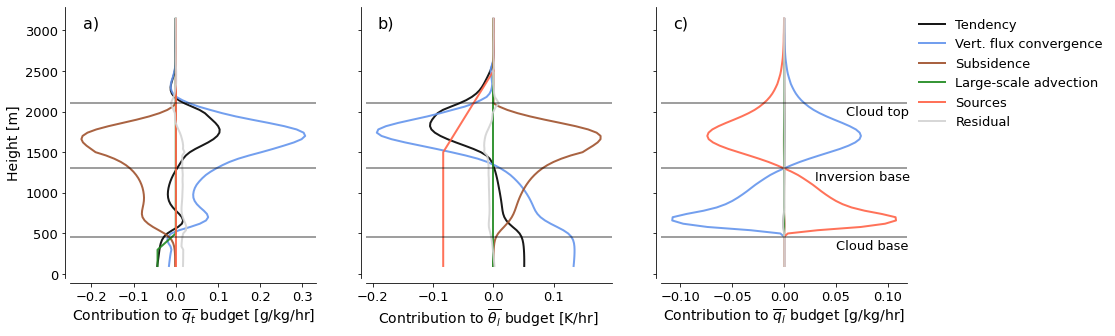

In [2]:
#%% Time-averaged, slab-averaged budget

tpltmin = 2.
tpltmax = 16.

terms = ['Tendency',
         'Vert. flux convergence',
         'Subsidence',
         'Large-scale advection',
         'Sources',
         'Residual',
         ]

colors = ['black',
          'cornflowerblue',
          'sienna',
          'forestgreen',
          'tomato',
          'lightgray']

fh = 3600 # => 1/s to 1/hr
fqh = 1000*3600 # kg/kg/s => g/kg/hr

itpltmin = np.where(time1d/3600>=tpltmin)[0][0]
itpltmax = np.where(time1d/3600<tpltmax)[0][-1]+1

qtav_tend = np.mean(ddt_qt_av_time[itpltmin:itpltmax,:],axis=0)
qtav_vdiv = np.mean(ddz_wqt_av_time[itpltmin:itpltmax,:],axis=0)
qtav_subs = np.mean(wfls_dqtdz_av_time[itpltmin:itpltmax,:],axis=0)
qtav_larg = dqdt_ls[1:-1]
qtav_sour = np.zeros(dqdt_ls[1:-1].shape)
qtav_budg = -qtav_vdiv - qtav_subs + qtav_larg + qtav_sour
qtav_resi = qtav_tend - qtav_budg

thlvav_tend = np.mean(ddt_thlv_av_time[itpltmin:itpltmax,:],axis=0)
thlvav_vdiv = np.mean(ddz_wthlv_av_time[itpltmin:itpltmax,:],axis=0)
thlvav_subs = np.mean(wfls_dthlvdz_av_time[itpltmin:itpltmax,:],axis=0)
thlvav_larg = np.mean(dthlvdt_ls[itpltmin:itpltmax,1:-1],axis=0)
thlvav_budg = -thlvav_vdiv - thlvav_subs + thlvav_larg
thlvav_resi = thlvav_tend - thlvav_budg

thlav_tend = np.mean(ddt_thl_av_time[itpltmin:itpltmax,:],axis=0)
thlav_vdiv = np.mean(ddz_wthl_av_time[itpltmin:itpltmax,:],axis=0)
thlav_subs = np.mean(wfls_dthldz_av_time[itpltmin:itpltmax,:],axis=0)
thlav_larg = np.zeros(qtav_larg.shape)
thlav_sour = dthldt_ls[1:-1] # Radiation
thlav_budg = -thlav_vdiv - thlav_subs + thlav_larg + thlav_sour
thlav_resi = thlav_tend - thlav_budg

qlav_tend = np.mean(ddt_ql_av_time[itpltmin:itpltmax,:],axis=0)
qlav_vdiv = np.mean(ddz_wql_av_time[itpltmin:itpltmax,:],axis=0)
qlav_subs = np.mean(wfls_dqldz_av_time[itpltmin:itpltmax,:],axis=0)
qlav_larg = np.zeros(qtav_larg.shape)
qlav_sour = qlav_vdiv # Assuming condensation equals transport
qlav_budg = -qlav_vdiv - qlav_subs + qlav_larg + qlav_sour
qlav_resi = qlav_tend - qlav_budg

ql_avi = np.mean(ql_av_1d[itpltmin:itpltmax,:],axis=0)
z_cb = zflim[ql_avi>0][1]
z_ib = zflim[np.argmax(np.mean(wql_av[itpltmin:itpltmax,:],axis=0))]
z_ct = zflim[ql_avi>0][-28]

alpha = 0.9
lw = 2

fig,axs = plt.subplots(ncols=3,sharey=True,figsize=(15,5))
axs[0].plot( qtav_tend*fqh, zflim[1:-1],c=colors[0],alpha=alpha,lw=lw)
axs[0].plot(-qtav_vdiv*fqh, zflim[1:-1],c=colors[1],alpha=alpha,lw=lw)
axs[0].plot(-qtav_subs*fqh, zflim[1:-1],c=colors[2],alpha=alpha,lw=lw)
axs[0].plot( qtav_larg*fqh, zflim[1:-1],c=colors[3],alpha=alpha,lw=lw)
axs[0].plot( qtav_sour*fqh, zflim[1:-1],c=colors[4],alpha=alpha,lw=lw)
axs[0].plot( qtav_resi*fqh, zflim[1:-1],c=colors[-1],alpha=alpha,lw=lw)
axs[0].axhline(z_cb,color='k',linestyle='-',alpha=alpha-0.4)
axs[0].axhline(z_ib,color='k',linestyle='-',alpha=alpha-0.4)
axs[0].axhline(z_ct,color='k',linestyle='-',alpha=alpha-0.4)
axs[0].set_xlabel(r"Contribution to $\overline{q_t}$ budget [g/kg/hr]")
axs[0].annotate('a)', (0.05,0.92), xycoords='axes fraction', fontsize=16)

axs[1].plot( thlav_tend*fh, zflim[1:-1],c=colors[0],alpha=alpha,lw=lw)
axs[1].plot(-thlav_vdiv*fh, zflim[1:-1],c=colors[1],alpha=alpha,lw=lw)
axs[1].plot(-thlav_subs*fh, zflim[1:-1],c=colors[2],alpha=alpha,lw=lw)
axs[1].plot( thlav_larg*fh, zflim[1:-1],c=colors[3],alpha=alpha,lw=lw)
axs[1].plot( thlav_sour*fh, zflim[1:-1],c=colors[4],alpha=alpha,lw=lw)
axs[1].plot( thlav_resi*fh, zflim[1:-1],c=colors[-1],alpha=alpha,lw=lw)
axs[1].axhline(z_cb,color='k',linestyle='-',alpha=alpha-0.4)
axs[1].axhline(z_ib,color='k',linestyle='-',alpha=alpha-0.4)
axs[1].axhline(z_ct,color='k',linestyle='-',alpha=alpha-0.4)
axs[1].set_xlabel(r"Contribution to $\overline{\theta_{l}}$ budget [K/hr]")
axs[1].annotate('b)', (0.05,0.92), xycoords='axes fraction', fontsize=16)

axs[2].plot( qlav_tend*fqh, zflim[1:-1],c=colors[0],alpha=alpha,lw=lw,label=terms[0])
axs[2].plot(-qlav_vdiv*fqh, zflim[1:-1],c=colors[1],alpha=alpha,lw=lw,label=terms[1])
axs[2].plot(-qlav_subs*fqh, zflim[1:-1],c=colors[2],alpha=alpha,lw=lw,label=terms[2])
axs[2].plot( qlav_larg*fqh, zflim[1:-1],c=colors[3],alpha=alpha,lw=lw,label=terms[3])
axs[2].plot( qlav_sour*fqh, zflim[1:-1],c=colors[4],alpha=alpha,lw=lw,label=terms[4])
axs[2].plot( qlav_resi*fqh, zflim[1:-1],c=colors[-1],alpha=alpha,lw=lw,label=terms[-1])
axs[2].axhline(z_cb,color='k',linestyle='-',alpha=alpha-0.4)
axs[2].axhline(z_ib,color='k',linestyle='-',alpha=alpha-0.4)
axs[2].axhline(z_ct,color='k',linestyle='-',alpha=alpha-0.4)
axs[2].set_xlabel(r"Contribution to $\overline{q_l}$ budget [g/kg/hr]")
axs[2].annotate('c)', (0.05,0.92), xycoords='axes fraction', fontsize=16)

axs[2].annotate(r"Cloud base",(5e-2,z_cb-150),annotation_clip=False)
axs[2].annotate(r"Inversion base",(3e-2,z_ib-150),annotation_clip=False)
axs[2].annotate(r"Cloud top",(6e-2,z_ct-150),annotation_clip=False)

axs[0].set_ylabel(r'Height [m]')
axs[2].legend(loc='best',bbox_to_anchor=(1,1), frameon=False)
sns.despine(offset=5)
plt.savefig(sp+'/slab_av_budget.pdf',bbox_inches='tight')

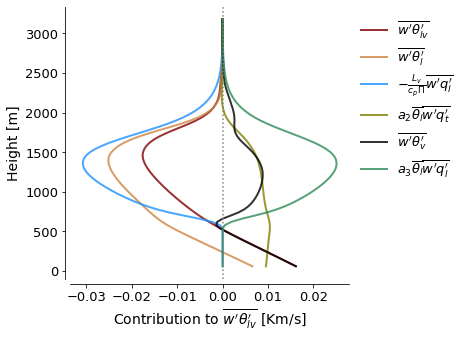

In [3]:
#%% Slab-averaged fluxes

# Time to average over
tpltmin = 6.
tpltmax = 16.
dit = 1.0
dtav = 1.0 # Around each plotted time step

terms = [r"$\overline{w'\theta_{lv}'}$",
         r"$\overline{w'\theta_l'}$",
         r"$-\frac{L_v}{c_p\Pi} \overline{w'q_l'}$",
         r"$a_2\overline{\theta_l}\overline{w'q_t'}$",
         r"$\overline{w'\theta_v'}$",
         r"$a_3\overline{\theta_l} \overline{w'q_l'}$",
         ]

colors = ['maroon',
          'peru',
          'dodgerblue',
          'olive',
          'black',
          'seagreen',
          ]

alpha = 0.8
lw = 2
a4 = Lv/exnf/cp # a4

itpltmin1d = np.where(time1d>=tpltmin*3600)[0][0]
itpltmax1d = np.where(time1d<tpltmax*3600)[0][-1]+1
idtplt = int(round(dit/(time[plttime[1]]-time[plttime[0]])))
plttime_var = np.arange(itpltmin1d,itpltmax1d,idtplt)

alphas = np.linspace(0.1,0.5,len(plttime_var))

# Contributions to wthv
wthvpmn_av = np.mean(dl.load_wthvav(izmin, izmax)[itpltmin1d:itpltmax1d,:],axis=0)
wthlpmn_av = np.mean(dl.load_wthlav(izmin, izmax)[itpltmin1d:itpltmax1d,:],axis=0)
a2wqtpmn_av = np.mean(0.608*thl_av_1d[itpltmin1d:itpltmax1d,:]*dl.load_wqtav(izmin,izmax)[itpltmin1d:itpltmax1d,:],axis=0)
wthlvpmn_av = wthlpmn_av + a2wqtpmn_av
a3wqlpmn_av = np.mean(7*thl_av_1d[itpltmin1d:itpltmax1d,:]*dl.load_wqlav(izmin,izmax)[itpltmin1d:itpltmax1d,:],axis=0)
a4wqlpmn_av = -np.mean(a4*dl.load_wqlav(izmin,izmax)[itpltmin1d:itpltmax1d,:],axis=0)

# wthvp_av plot
fig,axs = plt.subplots(nrows=1,ncols=1,figsize=(5,5), squeeze=False)
axs[0,0].plot(wthlvpmn_av, zflim,c=colors[0],alpha=alpha,lw=lw,label=terms[0])
axs[0,0].plot(wthlpmn_av, zflim,c=colors[1],alpha=alpha,lw=lw,label=terms[1])
axs[0,0].plot(a4wqlpmn_av, zflim,c=colors[2],alpha=alpha,lw=lw,label=terms[2])
axs[0,0].plot(a2wqtpmn_av, zflim,c=colors[3],alpha=alpha,lw=lw,label=terms[3])
axs[0,0].plot(wthvpmn_av, zflim,c=colors[4],alpha=alpha,lw=lw,label=terms[4])
axs[0,0].plot(a3wqlpmn_av, zflim,c=colors[5],alpha=alpha,lw=lw,label=terms[5])
axs[0,0].set_xlabel(r"Contribution to $\overline{w'\theta_{lv}'}$ [Km/s]")
axs[0,0].set_ylabel(r'Height [m]')
axs[0,0].axvline(0,color='gray',linestyle='dotted')
axs[0,0].legend(bbox_to_anchor=(1,1),loc='upper left', frameon=False)
sns.despine(offset=5)
plt.savefig(sp+'/wthv_av_decomposition.pdf',bbox_inches='tight')

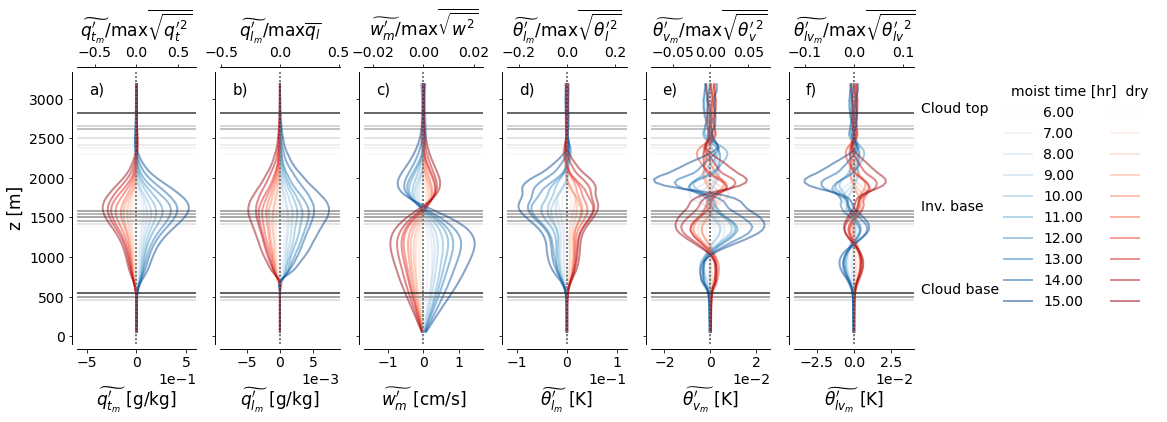

In [4]:
#%% Plotprofiles of  mesoscale-filtered variables in time
tpltmin = 6.
tpltmax = 16.
dit = 1.0 # Rounds to closest multiple of dt in time
dtav = 1.0 # Around each plotted time step
alpha = 0.5
lw=2
fm = 1e3 # convert kg/kg -> g/kg
fw = 1e2 # convert m/s -> cm/s

update_fontsizes(14, 17, 16)

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1
idtplt = int(round(dit/(time[plttime[1]]-time[plttime[0]])))
idtav  = int(round(dtav/2/(time[1]-time[0])))
idtav1 = int(round(dtav/2/(time1d[1]-time1d[0])*3600))
plttime_var = np.arange(itpltmin,itpltmax,idtplt)

def add_twinx(ax, norm, offset, label, return_axs=False, pad=None):
    ax2 = ax.twiny()
    ax2.xaxis.set_ticks_position('top')
    ax2.xaxis.set_label_position('top')
    ax2.spines['top'].set_position(('axes',offset))
    ax2.set_xlim((ax.get_xlim()[0]/norm,ax.get_xlim()[1]/norm))
    ax2.set_xlabel(label, labelpad=pad)
    if return_axs:
        return ax2

ax2offs=1.0
fig,axs = plt.subplots(ncols=6,sharey=True,figsize=(15,5))
for i in range(len(plttime_var)):
    ti = time[plttime_var[i]]
    
    colm = plt.cm.Blues(i/len(plttime_var))
    cold = plt.cm.Reds(i/len(plttime_var))
    colc = plt.cm.Greys(i/len(plttime_var))
    
    it1d = np.argmin(abs(ti-time1d/3600))
    
    ql_avi = np.mean(ql_av_1d[it1d-idtav1:it1d+idtav1],axis=0)
    z_cb = zflim[ql_avi>0][1]
    
    z_ib = zflim[np.argmin(np.mean(wthlv_av[it1d-idtav1:it1d+idtav1],axis=0))]
    
    z_ct = zflim[ql_avi>0][-10]
    
    axs[0].plot(np.mean(fm*qtpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim, 
                color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[0].plot(np.mean(fm*qtpf_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[0].axvline(0,color='gray',linestyle='dotted')
    axs[0].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[0].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[0].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == len(plttime_var)-1:
        axs[0].annotate('a)', (0.1,0.92), xycoords='axes fraction', fontsize=15)
        axs[0].set_xlabel(r"$\widetilde{q_{t_m}'}$ [g/kg]", labelpad=15)
        axs[0].set_xlim((-6e-4*fm,6e-4*fm))
        axs[0].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        qt2max = np.max(np.sqrt(dl.load_qt2av(izmin,izmax)[it1d]))*fm
        add_twinx(axs[0], qt2max, ax2offs, r"$\widetilde{q_{t_m}'}/\max \overline{\sqrt{q_t'^2}}$", pad=10)

    axs[1].plot(np.mean(fm*qlpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[1].plot(np.mean(fm*qlpf_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[1].axvline(0,color='gray',linestyle='dotted')
    axs[1].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[1].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[1].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == len(plttime_var)-1:
        axs[1].annotate('b)', (0.1,0.92), xycoords='axes fraction', fontsize=15)
        axs[1].set_xlabel(r"$\widetilde{q_{l_m}'}$ [g/kg]", labelpad=15)
        axs[1].set_xlim((-9e-6*fm,9e-6*fm))
        axs[1].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        add_twinx(axs[1], np.max(ql_av_1d)*fm, ax2offs, r"$\widetilde{q_{l_m}'}/\max \overline{q_l}$", pad=10)

    axs[2].plot(np.mean(fw*wff_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[2].plot(np.mean(fw*wff_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[2].axvline(0,color='gray',linestyle='dotted')
    axs[2].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[2].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[2].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == len(plttime_var)-1:
        axs[2].annotate('c)', (0.1,0.92), xycoords='axes fraction', fontsize=15)
        axs[2].set_xlabel(r"$\widetilde{w_m'}$ [cm/s]", labelpad=15)
        axs[2].set_xlim((-1.7e-2*fw,1.7e-2*fw))
        axs[2].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        w2max = np.max(np.sqrt(dl.load_w2tav(izmin,izmax)[it1d]))*fw
        add_twinx(axs[2], w2max, ax2offs, r"$\widetilde{w_m'}/\max \overline{\sqrt{w^2}}$", pad=10)

    axs[3].plot(np.mean(thlpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[3].plot(np.mean(thlpf_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[3].axvline(0,color='gray',linestyle='dotted')
    axs[3].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[3].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[3].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == len(plttime_var)-1:
        axs[3].annotate('d)', (0.1,0.92), xycoords='axes fraction', fontsize=15)
        axs[3].set_xlabel(r"$\widetilde{\theta_{l_m}'}$ [K]", labelpad=15)
        axs[3].set_xlim((-1.2e-1,1.2e-1))
        axs[3].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        thl2max = np.max(np.sqrt(dl.load_thl2av(izmin,izmax)[it1d]))
        axs32 = add_twinx(axs[3], thl2max, ax2offs, r"$\widetilde{\theta_{l_m}'}/\max \overline{\sqrt{\theta_l'^2}}$", return_axs=True, pad=10)
        # axs32.ticklabel_format(style='sci',axis='x',scilimits=(0,0))

    axs[4].plot(np.mean(thvpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[4].plot(np.mean(thvpf_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[4].axvline(0,color='gray',linestyle='dotted')
    axs[4].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[4].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[4].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == 0:
        axs[4].annotate('e)', (0.1,0.92), xycoords='axes fraction', fontsize=15)
        axs[4].set_xlabel(r"$\widetilde{\theta_{v_m}'}$ [K]", labelpad=15)
        axs[4].set_xlim((-2.6e-2,2.6e-2))
        axs[4].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        thv2max = np.max(np.sqrt(dl.load_thv2av(izmin,izmax)[it1d]))
        axs42 = add_twinx(axs[4], thv2max, ax2offs, r"$\widetilde{\theta_{v_m}'}/\max \overline{\sqrt{\theta_v'^2}}$", return_axs=True, pad=10)
        # axs42.ticklabel_format(style='sci',axis='x',scilimits=(0,0))
    
    axs[5].plot(np.mean(thlvpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                label='%.2f'%ti,color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[5].plot(np.mean(thlvpf_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                label=' ',color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[5].axvline(0,color='gray',linestyle='dotted')
    axs[5].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[5].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[5].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == len(plttime_var)-1:
        axs[5].annotate('f)', (0.1,0.92), xycoords='axes fraction', fontsize=15)
        axs[5].set_xlabel(r"$\widetilde{\theta_{lv_m}'}$ [K]", labelpad=15)
        axs[5].set_xlim((-4e-2,4e-2))
        axs[5].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        axs52 = add_twinx(axs[5], thv2max, ax2offs, r"$\widetilde{\theta_{lv_m}'}/\max \overline{\sqrt{\theta_{lv}'^2}}$", return_axs=True, pad=10)
        # axs52.ticklabel_format(style='sci',axis='x',scilimits=(0,0))

axs[0].set_ylabel('z [m]')
axs[5].annotate(r"Cloud base",(4.5e-2,z_cb),annotation_clip=False)
axs[5].annotate(r"Inv. base",(4.5e-2,z_ib),annotation_clip=False)
axs[5].annotate(r"Cloud top",(4.5e-2,z_ct),annotation_clip=False)
handles, labels = axs[5].get_legend_handles_labels()
handm = handles[::2];  labsm = labels[::2]
handd = handles[1::2]; labsd = labels[1::2]
handles = np.concatenate((handm,handd))
labels  = np.concatenate((labsm,labsd))
axs[5].legend(handles, labels, loc='best',bbox_to_anchor=(1.65,1),
              ncol=2,title='moist time [hr]  dry',frameon=False)
sns.despine(offset=5, top=False)
plt.savefig(sp+'/vars_meso_evo.pdf', bbox_inches='tight')

update_fontsizes(small_font, mediu_font, large_font)

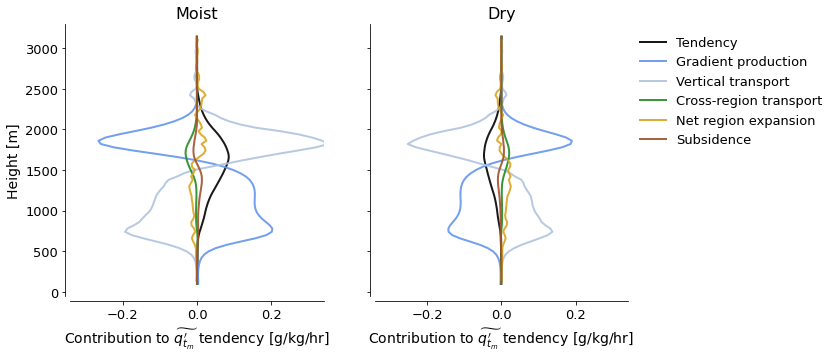

In [5]:
#%% Average budget contributions over time dimension
tpltmin = 10.
tpltmax = 16.

terms = ['Tendency              ',
         'Gradient production',
         'Vertical transport',
         'Cross-region transport',
         'Net region expansion',
         'Subsidence',
         'SFS diffusion',
         ]

colors = ['black',
          'cornflowerblue',
          'lightsteelblue',
          'forestgreen',
          'goldenrod',
          'sienna',
          ]

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1

qtpfmn_tend_moist = np.mean(qtpf_tend_moist_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_prod_moist_wex = np.mean(qtpf_prod_moist_wex_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_vdiv_moist = np.mean(qtpf_vdiv_moist_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_hdiv_moist = np.mean(qtpf_hdiv_moist_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_subs_moist = np.mean(qtpf_subs_moist_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_diff_moist = np.mean(qtpf_diff_moist_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_budg_moist = (-qtpfmn_prod_moist_wex[1:-1] - qtpfmn_vdiv_moist[1:-1]
                     -qtpfmn_hdiv_moist[1:-1] - qtpfmn_subs_moist[1:-1]
                      +qtpfmn_diff_moist)
qtpfmn_resi_moist = qtpfmn_tend_moist[1:-1] - qtpfmn_budg_moist

# Subsume the diffusion under vertical transport
qtpfmn_vdiv_moist = qtpfmn_vdiv_moist[1:-1]-qtpfmn_diff_moist


qtpfmn_tend_dry = np.mean(qtpf_tend_dry_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_prod_dry_wex = np.mean(qtpf_prod_dry_wex_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_vdiv_dry = np.mean(qtpf_vdiv_dry_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_hdiv_dry = np.mean(qtpf_hdiv_dry_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_subs_dry = np.mean(qtpf_subs_dry_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_diff_dry = np.mean(qtpf_diff_dry_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_budg_dry = (-qtpfmn_prod_dry_wex[1:-1] - qtpfmn_vdiv_dry[1:-1]
                     -qtpfmn_hdiv_dry[1:-1] - qtpfmn_subs_dry[1:-1]
                      +qtpfmn_diff_dry)
qtpfmn_resi_dry = qtpfmn_tend_dry[1:-1] - qtpfmn_budg_dry
qtpfmn_vdiv_dry = qtpfmn_vdiv_dry[1:-1]-qtpfmn_diff_dry

alpha = 0.9
lw = 2
fq = 1e3*3600 # kg/kg/s => g/kg/hr

fig,axs = plt.subplots(ncols=2,sharey=True,figsize=(10,5))
axs[0].plot(qtpfmn_tend_moist*fq, zflim[1:-1],c=colors[0],alpha=alpha,lw=lw)
axs[0].plot(-qtpfmn_prod_moist_wex*fq, zflim[1:-1],c=colors[1],alpha=alpha,lw=lw)
axs[0].plot(-qtpfmn_vdiv_moist*fq, zflim[2:-2],c=colors[2],alpha=alpha,lw=lw)
axs[0].plot(-qtpfmn_hdiv_moist*fq, zflim[1:-1],c=colors[3],alpha=alpha,lw=lw)
axs[0].plot(qtpfmn_resi_moist*fq, zflim[2:-2],c=colors[4],alpha=alpha,lw=lw)
axs[0].plot(-qtpfmn_subs_moist*fq, zflim[1:-1],c=colors[5],alpha=alpha,lw=lw)
axs[0].set_xlabel(r"Contribution to $\widetilde{q_{t_m}'}$ tendency [g/kg/hr]")
axs[0].set_xlim((-9.5e-8*fq,9.5e-8*fq))
axs[0].set_title('Moist')

axs[1].plot(qtpfmn_tend_dry*fq, zflim[1:-1],c=colors[0],label=terms[0],alpha=alpha,lw=lw)
axs[1].plot(-qtpfmn_prod_dry_wex*fq, zflim[1:-1],c=colors[1],label=terms[1],alpha=alpha,lw=lw)
axs[1].plot(-qtpfmn_vdiv_dry*fq, zflim[2:-2],c=colors[2],label=terms[2],alpha=alpha,lw=lw)
axs[1].plot(-qtpfmn_hdiv_dry*fq, zflim[1:-1],c=colors[3],label=terms[3],alpha=alpha,lw=lw)
axs[1].plot(qtpfmn_resi_dry*fq, zflim[2:-2],c=colors[4],label=terms[4],alpha=alpha,lw=lw)
axs[1].plot(-qtpfmn_subs_dry*fq, zflim[1:-1],c=colors[5],label=terms[5],alpha=alpha,lw=lw)
axs[1].set_xlabel(r"Contribution to $\widetilde{q_{t_m}'}$ tendency [g/kg/hr]")
axs[1].set_xlim((-9.5e-8*fq,9.5e-8*fq))
axs[1].set_title('Dry')

axs[0].set_ylabel(r'Height [m]')
axs[1].legend(loc='upper left',bbox_to_anchor=(1,1), frameon=False)
sns.despine(offset=5)

plt.savefig(sp+'/qtpf_budget.pdf',bbox_inches='tight')

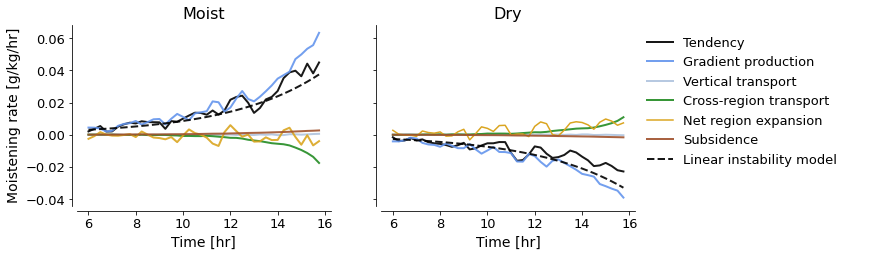

In [6]:
#%% Vertically integrated statistics
tpltmin = 6.
tpltmax = 16.
dit = 0.25 # Rounds to closest multiple of dt in time
dtav = 1.0 # Average around each plotted time step
alpha = 0.9
lw=2
fq=1e3*3600 # kg/kg/s => g/kg/hr

# Model
C = 0.3
thl0 = 299.1

terms = ['Tendency                               ',
         'Gradient production',
         'Vertical transport',
         'Cross-region transport',
         'Net region expansion',
         'Subsidence',
         'SFS diffusion',
         'Linear instability model'
         ]

colors = ['black',
          'cornflowerblue',
          'lightsteelblue',
          'forestgreen',
          'goldenrod',
          'sienna',
          ]

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1
idtplt = int(round(dit/(time[plttime[1]]-time[plttime[0]])))
idtav  = int(round(dtav/2/(time[1]-time[0])))
plttime_var = np.arange(itpltmin,itpltmax,idtplt)
  
# 1D fields
rhobfi = rhobf[0,izmin:izmax] # Won't really change much through time, so ok to take 0 value

qtpfi_moist = vint(qtpf_moist_time,rhobfi,zflim,plttime_var,norm=True)
qtpfi_dry = vint(qtpf_dry_time,rhobfi,zflim,plttime_var,norm=True)

# Tendency
qtpfi_tend_moist = vint(qtpf_tend_moist_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)
qtpfi_tend_dry = vint(qtpf_tend_dry_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)

# Moistening gradient production per simplified WTG budget
qtpfi_prod_moist = vint(qtpf_prod_moist_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)
qtpfi_prod_dry = vint(qtpf_prod_dry_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)

qtpfi_prod_wex_moist = vint(qtpf_prod_moist_wex_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)
qtpfi_prod_wex_dry = vint(qtpf_prod_dry_wex_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)

# Moistening through anomalous vertical small-scale fluxes
# FIXME not so clean - offset zf in integration by 1 from field
qtpfi_vdiv_moist = vint(qtpf_vdiv_moist_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)
qtpfi_vdiv_dry = vint(qtpf_vdiv_dry_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)

# Moistening through horizontal advection
qtpfi_hdiv_moist = vint(qtpf_hdiv_moist_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)
qtpfi_hdiv_dry = vint(qtpf_hdiv_dry_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)

# Moistening through subsidence
qtpfi_subs_moist = vint(qtpf_subs_moist_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)
qtpfi_subs_dry = vint(qtpf_subs_dry_time,rhobfi[1:-1],zflim[1:-1],plttime_var,norm=True)

# Moistening through SFS diffusion
qtpfi_diff_moist = vint(qtpf_diff_moist_time,rhobfi[2:-2],zflim[2:-2],plttime_var,norm=True)
qtpfi_diff_dry = vint(qtpf_diff_dry_time,rhobfi[2:-2],zflim[2:-2],plttime_var,norm=True)

# Estimate residual
qtpfi_resid_moist = qtpfi_tend_moist + qtpfi_prod_wex_moist + qtpfi_vdiv_moist + qtpfi_hdiv_moist + qtpfi_subs_moist #- qtpfi_diff_moist
qtpfi_resid_dry = qtpfi_tend_dry + qtpfi_prod_wex_dry + qtpfi_vdiv_dry + qtpfi_hdiv_dry + qtpfi_subs_dry #- qtpfi_diff_dry

# Include diffusion in vertical transport
qtpfi_vdiv_moist = qtpfi_vdiv_moist - qtpfi_diff_moist
qtpfi_vdiv_dry = qtpfi_vdiv_dry - qtpfi_diff_dry

# Add simple linear instability model
zwmax = 500
izwmax = np.where(zflim>zwmax)[0][0]
w2 = dl.load_w2tav(izmin, izmax)
wstar = np.sqrt(np.mean(w2[:,:izwmax]))

# gammas
Gamrat = Gamma_qt/Gamma_thlv
Gamratz = (Gamrat[:,1:] - Gamrat[:,:-1])/(zflim[1] - zflim[0])
Gamratz_pl = np.mean(Gamratz[itpltmin:itpltmax,:],axis=0)
Gamratz_mn = np.mean(Gamratz_pl[20:40]) # Cloud-layer average

# Model
tref = 8. # Reference time for model constant
itref = np.argmin(np.abs(time-tref))
itrefvar = np.argmin(np.abs(time[plttime_var]-tref))
tau = 1. / (C*thl0*wstar*Gamratz_mn)
qtpfi0_moist = qtpfi_moist[itrefvar]
qtpfi0_dry = qtpfi_dry[itrefvar]

qtpfi_tend_moist_mod = qtpfi0_moist/tau*np.exp((time[plttime_var]-time[itref])*3600/tau)
qtpfi_tend_dry_mod = qtpfi0_dry/tau*np.exp((time[plttime_var]-time[itref])*3600/tau)

# Temporal plot
fig,axs = plt.subplots(ncols=2,sharey=True,figsize=(10,10/3))
axs[0].plot(time[plttime_var],fq*qtpfi_tend_moist,c=colors[0],alpha=alpha,lw=lw)
axs[0].plot(time[plttime_var],fq*-qtpfi_prod_wex_moist,c=colors[1],alpha=alpha,lw=lw)
axs[0].plot(time[plttime_var],fq*-qtpfi_vdiv_moist,c=colors[2],alpha=alpha,lw=lw)
axs[0].plot(time[plttime_var],fq*-qtpfi_hdiv_moist,c=colors[3],alpha=alpha,lw=lw)
axs[0].plot(time[plttime_var],fq*qtpfi_resid_moist,c=colors[4],alpha=alpha,lw=lw)
axs[0].plot(time[plttime_var],fq*-qtpfi_subs_moist,c=colors[5],alpha=alpha,lw=lw)
axs[0].plot(time[plttime_var],fq*qtpfi_tend_moist_mod,c=colors[0],alpha=alpha,lw=lw,linestyle='--')
axs[0].set_xlabel('Time [hr]')
axs[0].set_title('Moist')

axs[1].plot(time[plttime_var],fq*qtpfi_tend_dry,c=colors[0],label=terms[0],alpha=alpha,lw=lw)
axs[1].plot(time[plttime_var],fq*-qtpfi_prod_wex_dry,c=colors[1],label=terms[1],alpha=alpha,lw=lw)
axs[1].plot(time[plttime_var],fq*-qtpfi_vdiv_dry,c=colors[2],label=terms[2],alpha=alpha,lw=lw)
axs[1].plot(time[plttime_var],fq*-qtpfi_hdiv_dry,c=colors[3],label=terms[3],alpha=alpha,lw=lw)
axs[1].plot(time[plttime_var],fq*qtpfi_resid_dry,c=colors[4],label=terms[4])
axs[1].plot(time[plttime_var],fq*-qtpfi_subs_dry,c=colors[5],label=terms[5],alpha=alpha,lw=lw)
axs[1].plot(time[plttime_var],fq*qtpfi_tend_dry_mod,c=colors[0],label=terms[-1],alpha=alpha,lw=lw,linestyle='--')
axs[1].set_xlabel('Time [hr]')
axs[1].set_title('Dry')

axs[0].set_ylabel('Moistening rate [g/kg/hr]')
axs[1].legend(loc='best',bbox_to_anchor=(1,1), frameon=False)
sns.despine(offset=5)
plt.savefig(sp+'/qtpf_budget_int.pdf',bbox_inches='tight')

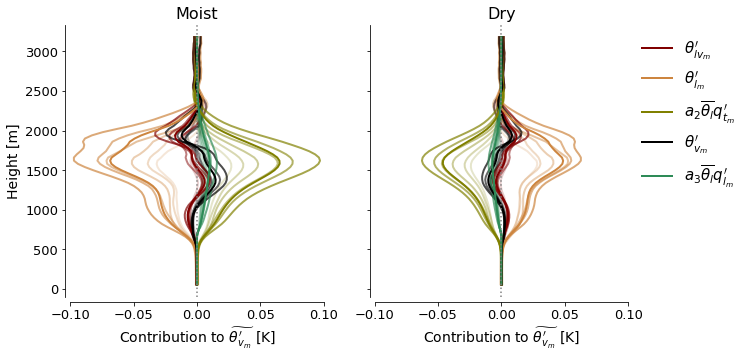

In [7]:
#%% Fluctuations of thlv

# Time to average over
tpltmin = 10.
tpltmax = 16.
dit = 1.0
dtav = 1.0 # Around each plotted time step

terms0 = [r"$\theta_{lv_m}'$",
          r"$\theta_{l_m}'$",
          r"$a_2\overline{\theta_l}q_{t_m}'$",
          r"$\theta_{v_m}'$",
          r"$a_3\overline{\theta_l}q_{l_m}'$",
         ]

colors = ['maroon',
          'peru',
          'olive',
          'black',
          'seagreen',
          'dodgerblue'
          ]

alpha = 1.0
amin = 0.2
amax = 0.7
lw = 2
a4 = Lv/exnf/cp # a4

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1

itpltmin1d = np.where(time1d>=tpltmin*3600)[0][0]
itpltmax1d = np.where(time1d<tpltmax*3600)[0][-1]+1

idtplt = int(round(dit/(time[plttime[1]]-time[plttime[0]])))
idtav  = int(round(dtav/2/(time[1]-time[0])))
plttime_var = np.arange(itpltmin,itpltmax,idtplt) #FIXME

alphas = np.linspace(amin,amax,len(plttime_var))

# Contributions to thv
thvpfmn_moist = np.mean(thvpf_moist_time[itpltmin:itpltmax,:],axis=0)
thvpfmn_dry = np.mean(thvpf_dry_time[itpltmin:itpltmax,:],axis=0)

thlvpfmn_moist = np.mean(thlvpf_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_dry = np.mean(thlvpf_dry_time[itpltmin:itpltmax,:],axis=0)

thlpfmn_moist = np.mean(thlpf_moist_time[itpltmin:itpltmax,:],axis=0)
thlpfmn_dry = np.mean(thlpf_dry_time[itpltmin:itpltmax,:],axis=0)

a2qtpfmn_moist = np.mean(0.608*thl_av_time[itpltmin:itpltmax,:]*qtpf_moist_time[itpltmin:itpltmax,:],axis=0)
a2qtpfmn_dry = np.mean(0.608*thl_av_time[itpltmin:itpltmax,:]*qtpf_dry_time[itpltmin:itpltmax,:],axis=0)

a3qlpfmn_moist = np.mean(7*thl_av_time[itpltmin:itpltmax,:]*qlpf_moist_time[itpltmin:itpltmax,:],axis=0)
a3qlpfmn_dry = np.mean(7*thl_av_time[itpltmin:itpltmax,:]*qlpf_dry_time[itpltmin:itpltmax,:],axis=0)

# Plots
fig,axs = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(10,5), squeeze=False)
# Evolution
for i in range(len(plttime_var)):
    axs[0,0].plot(np.mean(thlvpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,c=colors[0],alpha=alphas[i],lw=lw)
    axs[0,0].plot(np.mean(thlpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,c=colors[1],alpha=alphas[i],lw=lw)
    axs[0,0].plot(np.mean(0.608*(thl_av_time*qtpf_moist_time)[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,c=colors[2],alpha=alphas[i],lw=lw)
    axs[0,0].plot(np.mean(thvpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,c=colors[3],alpha=alphas[i],lw=lw)
    axs[0,0].plot(np.mean(7*(thl_av_time*qlpf_moist_time)[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,c=colors[4],alpha=alphas[i],lw=lw)
    
    axs[0,1].plot(np.mean(thlvpf_dry_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,c=colors[0],alpha=alphas[i],lw=lw)
    axs[0,1].plot(np.mean(thlpf_dry_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,c=colors[1],alpha=alphas[i],lw=lw)
    axs[0,1].plot(np.mean(0.608*(thl_av_time*qtpf_dry_time)[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,c=colors[2],alpha=alphas[i],lw=lw)
    axs[0,1].plot(np.mean(thvpf_dry_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,c=colors[3],alpha=alphas[i],lw=lw)
    axs[0,1].plot(np.mean(7*(thl_av_time*qlpf_dry_time)[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,c=colors[4],alpha=alphas[i],lw=lw)

# And period mean
axs[0,0].plot(thlvpfmn_moist, zflim,c=colors[0],alpha=alpha,lw=lw)
axs[0,0].plot(thlpfmn_moist, zflim,c=colors[1],alpha=alpha,lw=lw)
axs[0,0].plot(a2qtpfmn_moist, zflim,c=colors[2],alpha=alpha,lw=lw)
axs[0,0].plot(thvpfmn_moist, zflim,c=colors[3],alpha=alpha,lw=lw)
axs[0,0].plot(a3qlpfmn_moist, zflim,c=colors[4],alpha=alpha,lw=lw)
axs[0,0].set_xlabel(r"Contribution to $\widetilde{\theta_{v_m}'}$ [K]")
axs[0,0].set_ylabel(r'Height [m]')
axs[0,0].axvline(0,color='gray',linestyle='dotted')
axs[0,0].set_xlim((-0.1,0.1))
axs[0,0].set_title('Moist')

axs[0,1].plot(thlvpfmn_dry, zflim,c=colors[0],alpha=alpha,lw=lw,label=terms0[0])
axs[0,1].plot(thlpfmn_dry, zflim,c=colors[1],alpha=alpha,lw=lw,label=terms0[1])
axs[0,1].plot(a2qtpfmn_dry, zflim,c=colors[2],alpha=alpha,lw=lw,label=terms0[2])
axs[0,1].plot(thvpfmn_dry, zflim,c=colors[3],alpha=alpha,lw=lw,label=terms0[3])
axs[0,1].plot(a3qlpfmn_dry, zflim,c=colors[4],alpha=alpha,lw=lw,label=terms0[4])
axs[0,1].set_xlabel(r"Contribution to $\widetilde{\theta_{v_m}'}$ [K]")
axs[0,1].axvline(0,color='gray',linestyle='dotted')
axs[0,1].set_xlim((-0.1,0.1))
axs[0,1].set_title('Dry')
axs[0,1].legend(bbox_to_anchor=(1,1),loc='upper left',frameon=False, fontsize=15)
sns.despine(offset=5)
plt.savefig(sp+'/thv_decomposition.pdf',bbox_inches='tight')

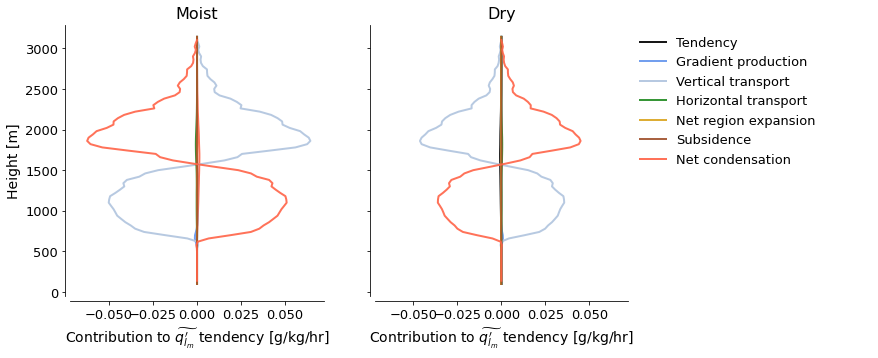

In [8]:
#%% qlpf budget
tpltmin = 10.
tpltmax = 16.

terms = ['Tendency                               ',
         'Gradient production',
         'Vertical transport',
         'Horizontal transport',
         'Net region expansion',
         'Subsidence',
         'Net condensation',
         'SFS diffusion',
         ]

colors = ['black',
          'cornflowerblue',
          'lightsteelblue',
          'forestgreen',
          'goldenrod',
          'sienna',
          'tomato'
          ]

fql = 1e3*3600 # kg/kg/s => g/kg/hr
alpha=0.9

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1

qlpf_tend_moist_time = np.zeros(qlpf_vdiv_moist_time.shape)
qlpf_tend_dry_time = np.zeros(qlpf_vdiv_dry_time.shape)
qlpf_tend_moist_time[1:,:] = tderive(qlpf_moist_time, time)
qlpf_tend_dry_time[1:,:] = tderive(qlpf_dry_time, time)

qlpfmn_moist = np.mean(qlpf_moist_time[itpltmin:itpltmax,:],axis=0)
qlpfmn_tend_moist = np.mean(qlpf_tend_moist_time[itpltmin:itpltmax,:],axis=0)
qlpfmn_prod_moist = np.mean(qlpf_prod_moist_time[itpltmin:itpltmax,:],axis=0)
qlpfmn_vdiv_moist = np.mean(qlpf_vdiv_moist_time[itpltmin:itpltmax,:],axis=0)
qlpfmn_hdiv_moist = np.mean(qlpf_hdiv_moist_time[itpltmin:itpltmax,:],axis=0)
qlpfmn_expa_moist = np.zeros(qlpfmn_hdiv_moist.shape)
qlpfmn_subs_moist = np.mean(qlpf_subs_moist_time[itpltmin:itpltmax,:],axis=0)
qlpfmn_diff_moist = np.mean(qlpf_diff_moist_time[itpltmin:itpltmax,:],axis=0)
qlpfmn_budg_moist = (-qlpfmn_prod_moist[1:-1] - qlpfmn_vdiv_moist[1:-1]
                     -qlpfmn_hdiv_moist[1:-1] - qlpfmn_subs_moist[1:-1]
                      +qlpfmn_diff_moist)
# Residual => Condensation
qlpfmn_cond_moist = qlpfmn_tend_moist[1:-1] - qlpfmn_budg_moist

# Subsume the diffusion under vertical transport
qlpfmn_vdiv_moist = qlpfmn_vdiv_moist[1:-1]-qlpfmn_diff_moist


qlpfmn_tend_dry = np.mean(qlpf_tend_dry_time[itpltmin:itpltmax,:],axis=0)
qlpfmn_prod_dry = np.mean(qlpf_prod_dry_time[itpltmin:itpltmax,:],axis=0)
qlpfmn_vdiv_dry = np.mean(qlpf_vdiv_dry_time[itpltmin:itpltmax,:],axis=0)
qlpfmn_hdiv_dry = np.mean(qlpf_hdiv_dry_time[itpltmin:itpltmax,:],axis=0)
qlpfmn_expa_dry = np.zeros(qlpfmn_hdiv_dry.shape) # Cannot compute => Set to zero for now
qlpfmn_subs_dry = np.mean(qlpf_subs_dry_time[itpltmin:itpltmax,:],axis=0)
qlpfmn_diff_dry = np.mean(qlpf_diff_dry_time[itpltmin:itpltmax,:],axis=0)
qlpfmn_budg_dry = (-qlpfmn_prod_dry[1:-1] - qlpfmn_vdiv_dry[1:-1]
                     -qlpfmn_hdiv_dry[1:-1] - qlpfmn_subs_dry[1:-1]
                      +qlpfmn_diff_dry)
# Residual => Condensation
qlpfmn_cond_dry = qlpfmn_tend_dry[1:-1] - qlpfmn_budg_dry

# Subsume the diffusion under vertical transport
qlpfmn_vdiv_dry = qlpfmn_vdiv_dry[1:-1]-qlpfmn_diff_dry

fig,axs = plt.subplots(ncols=2,sharey=True,figsize=(10,5))
axs[0].plot( qlpfmn_tend_moist*fql, zflim[1:-1],c=colors[-1],alpha=alpha,lw=lw)
axs[0].plot(-qlpfmn_prod_moist*fql, zflim[1:-1],c=colors[1],alpha=alpha,lw=lw)
axs[0].plot(-qlpfmn_vdiv_moist*fql, zflim[2:-2],c=colors[2],alpha=alpha,lw=lw)
axs[0].plot(-qlpfmn_hdiv_moist*fql, zflim[1:-1],c=colors[3],alpha=alpha,lw=lw)
axs[0].plot( qlpfmn_expa_moist*fql, zflim[1:-1],c=colors[4],alpha=alpha,lw=lw)
axs[0].plot(-qlpfmn_subs_moist*fql, zflim[1:-1],c=colors[5],alpha=alpha,lw=lw)
axs[0].plot( qlpfmn_cond_moist*fql, zflim[2:-2],c=colors[6],alpha=alpha,lw=lw)
axs[0].set_xlabel(r"Contribution to $\widetilde{q_{l_m}'}$ tendency [g/kg/hr]")
axs[0].set_xlim((-2e-8*fql,2e-8*fql))
axs[0].set_title('Moist')

axs[1].plot(qlpfmn_tend_dry*fql, zflim[1:-1],c=colors[0],label=terms[0],alpha=alpha,lw=lw)
axs[1].plot(-qlpfmn_prod_dry*fql, zflim[1:-1],c=colors[1],label=terms[1],alpha=alpha,lw=lw)
axs[1].plot(-qlpfmn_vdiv_dry*fql, zflim[2:-2],c=colors[2],label=terms[2],alpha=alpha,lw=lw)
axs[1].plot(-qlpfmn_hdiv_dry*fql, zflim[1:-1],c=colors[3],label=terms[3],alpha=alpha,lw=lw)
axs[1].plot( qlpfmn_expa_dry*fql, zflim[1:-1],c=colors[4],label=terms[4],alpha=alpha,lw=lw)
axs[1].plot(-qlpfmn_subs_dry*fql, zflim[1:-1],c=colors[5],label=terms[5],alpha=alpha,lw=lw)
axs[1].plot( qlpfmn_cond_dry*fql, zflim[2:-2],c=colors[6],label=terms[6],alpha=alpha,lw=lw)
axs[1].set_xlabel(r"Contribution to $\widetilde{q_{l_m}'}$ tendency [g/kg/hr]")
axs[1].set_xlim((-2e-8*fql,2e-8*fql))
axs[1].set_title('Dry')

axs[0].set_ylabel(r'Height [m]')
axs[1].legend(loc='best',bbox_to_anchor=(1,1), frameon=False)
sns.despine(offset=5)
plt.savefig(sp+'/qlpf_budget.pdf',bbox_inches='tight')



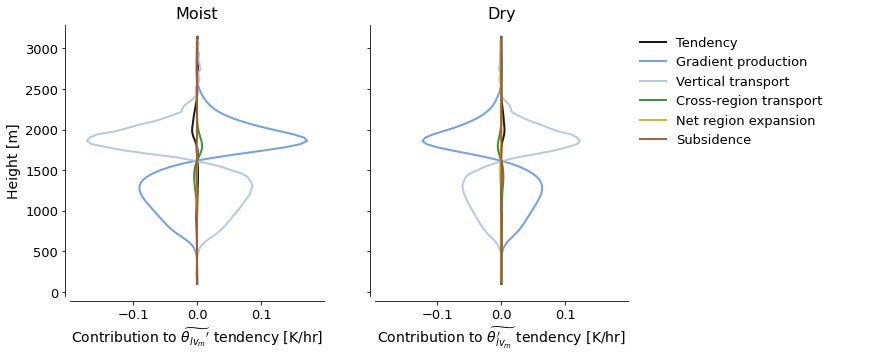

In [9]:
#%% Average thlvpf budget contributions over time dimension
tpltmin = 10.
tpltmax = 16.

ft = 3600 # K/s => K/hr
alpha = 0.9

terms = ['Tendency                               ',
         'Gradient production',
         'Vertical transport',
         'Cross-region transport',
         'Net region expansion',
         'Subsidence',
         'SFS diffusion'
         ]

colors = ['black',
          'cornflowerblue',
          'lightsteelblue',
          'forestgreen',
          'goldenrod',
          'sienna',
          'tomato'
          ]

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1

thlvpfmn_tend_moist = np.mean(thlvpf_tend_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_prod_moist = np.mean(thlvpf_prod_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_vdiv_moist = np.mean(thlvpf_vdiv_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_hdiv_moist = np.mean(thlvpf_hdiv_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_subs_moist = np.mean(thlvpf_subs_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_diff_moist = np.mean(thlvpf_diff_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_budg_moist = (-thlvpfmn_prod_moist[1:-1] - thlvpfmn_vdiv_moist[1:-1]
                       -thlvpfmn_hdiv_moist[1:-1] - thlvpfmn_subs_moist[1:-1]
                       +thlvpfmn_diff_moist)
thlvpfmn_resi_moist = thlvpfmn_tend_moist[1:-1] - thlvpfmn_budg_moist

# Absorb resdiual in vertical flux, as its numerical integration errors
# are probably larger than the region expansion effect
thlvpfmn_vdiv_moist = thlvpfmn_vdiv_moist[1:-1] - thlvpfmn_resi_moist
thlvpfmn_resi_moist = np.zeros(thlvpfmn_resi_moist.shape)

# thlvpfmn_vdiv_moist = thlvpfmn_vdiv_moist[1:-1] - thlvpfmn_diff_moist

thlvpfmn_tend_dry = np.mean(thlvpf_tend_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_prod_dry = np.mean(thlvpf_prod_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_vdiv_dry = np.mean(thlvpf_vdiv_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_hdiv_dry = np.mean(thlvpf_hdiv_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_subs_dry = np.mean(thlvpf_subs_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_diff_dry = np.mean(thlvpf_diff_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_budg_dry = (-thlvpfmn_prod_dry[1:-1] - thlvpfmn_vdiv_dry[1:-1]
                     -thlvpfmn_hdiv_dry[1:-1] - thlvpfmn_subs_dry[1:-1]
                     +thlvpfmn_diff_dry)
thlvpfmn_resi_dry = thlvpfmn_tend_dry[1:-1] - thlvpfmn_budg_dry

thlvpfmn_vdiv_dry = thlvpfmn_vdiv_dry[1:-1] - thlvpfmn_resi_dry
thlvpfmn_resi_dry = np.zeros(thlvpfmn_resi_dry.shape)

# thlvpfmn_vdiv_dry = thlvpfmn_vdiv_dry[1:-1] - thlvpfmn_diff_dry

fig,axs = plt.subplots(ncols=2,sharey=True,figsize=(10,5))
axs[0].plot(ft*thlvpfmn_tend_moist, zflim[1:-1],c=colors[0],alpha=alpha,lw=lw)
axs[0].plot(ft*-thlvpfmn_prod_moist, zflim[1:-1],c=colors[1],alpha=alpha,lw=lw)
axs[0].plot(ft*-thlvpfmn_vdiv_moist, zflim[2:-2],c=colors[2],alpha=alpha,lw=lw)
axs[0].plot(ft*-thlvpfmn_hdiv_moist, zflim[1:-1],c=colors[3],alpha=alpha,lw=lw)
axs[0].plot(ft* thlvpfmn_resi_moist, zflim[2:-2],c=colors[4],alpha=alpha,lw=lw)
axs[0].plot(ft*-thlvpfmn_subs_moist, zflim[1:-1],c=colors[5],alpha=alpha,lw=lw)
# axs[0].plot( thlvpfmn_diff_moist, zflim[2:-2],c=colors[5],alpha=alpha,lw=lw)
axs[0].set_xlabel(r"Contribution to $\widetilde{\theta_{lv_m}}'$ tendency [K/hr]")
axs[0].set_xlim((ft*-5.5e-5,ft*5.5e-5))
axs[0].set_title('Moist')

axs[1].plot(ft*thlvpfmn_tend_dry, zflim[1:-1],c=colors[0],label=terms[0],alpha=alpha,lw=lw)
axs[1].plot(ft*-thlvpfmn_prod_dry, zflim[1:-1],c=colors[1],label=terms[1],alpha=alpha,lw=lw)
axs[1].plot(ft*-thlvpfmn_vdiv_dry, zflim[2:-2],c=colors[2],label=terms[2],alpha=alpha,lw=lw)
axs[1].plot(ft*-thlvpfmn_hdiv_dry, zflim[1:-1],c=colors[3],label=terms[3],alpha=alpha,lw=lw)
axs[1].plot(ft* thlvpfmn_resi_dry, zflim[2:-2],c=colors[4],label=terms[4],alpha=alpha,lw=lw)
axs[1].plot(ft*-thlvpfmn_subs_dry, zflim[1:-1],c=colors[5],label=terms[5],alpha=alpha,lw=lw)
# axs[1].plot (thlvpfmn_diff_dry, zflim[2:-2],c=colors[5],label=terms[5],alpha=alpha,lw=lw)
axs[1].set_xlabel(r"Contribution to $\widetilde{\theta_{lv_m}'}$ tendency [K/hr]")
axs[1].set_xlim((ft*-5.5e-5,ft*5.5e-5))
axs[1].set_title('Dry')

axs[0].set_ylabel(r'Height [m]')
axs[1].legend(loc='best',bbox_to_anchor=(1,1), frameon=False)

sns.despine(offset=5)

plt.savefig(sp+'/thlvpf_budget.pdf',bbox_inches='tight')

/Users/martinjanssens/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in true_divide
/Users/martinjanssens/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in true_divide
/Users/martinjanssens/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide
/Users/martinjanssens/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


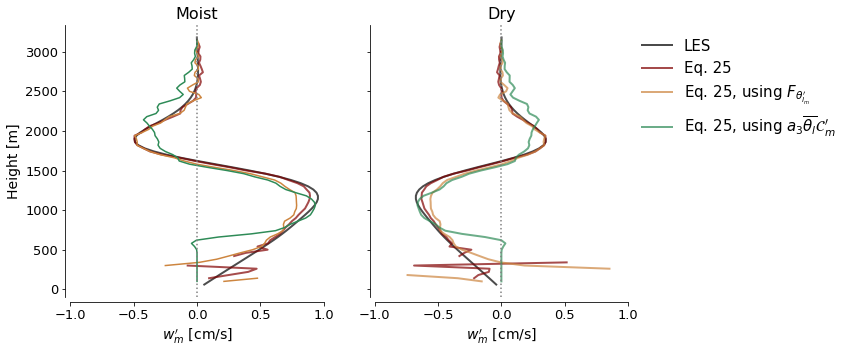

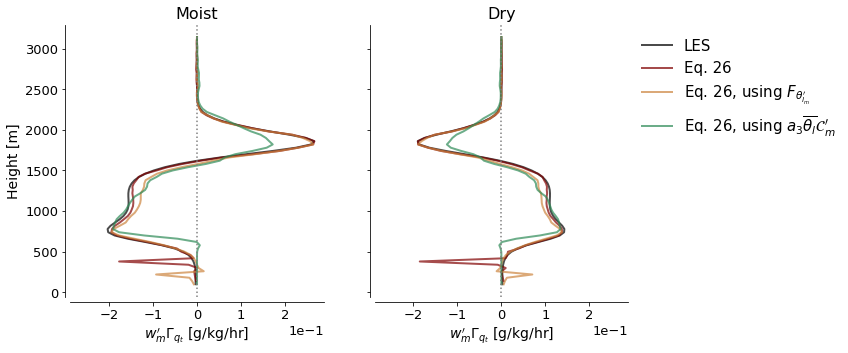

In [10]:
#%% WTG-based model of moisture variance production

tpltmin = 10.
tpltmax = 16.

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1

labels0 = ["LES",
           r"Eq. 25",
           r"Eq. 25, using $F_{\theta_{l_m}'}$",
           r"Eq. 25, using $a_3\overline{\theta_l}\mathcal{C}_m'$"
          ]

labels1 = ["LES",
           r"Eq. 26",
           r"Eq. 26, using $F_{\theta_{l_m}'}$",
           r"Eq. 26, using $a_3\overline{\theta_l}\mathcal{C}_m'$"
          ]

colors = ['black',
          'maroon',
          'peru',
          'olive',
          'seagreen',
          ]
lw=2
alpha=0.7
fw = 100 # m/s => cm/s
fq = 1000*3600 # kg/kg/s => g/kg/hr
xlimw = 0.01*fw
xlimq = 8e-8*fq

# Vertical velocities

# Exact
wffmn_moist = np.mean(wff_moist_time[itpltmin:itpltmax],axis=0)
wffmn_dry = np.mean(wff_dry_time[itpltmin:itpltmax],axis=0)

# w model with actual thlvpf_vdiv (including budget residual)
thlvpf_budg_moist = (-thlvpf_prod_moist_time[:,1:-1] - thlvpf_vdiv_moist_time[:,1:-1]
                      -thlvpf_hdiv_moist_time[:,1:-1] - thlvpf_subs_moist_time[:,1:-1]
                      +thlvpf_diff_moist_time)
thlvpf_resi_moist = thlvpf_tend_moist_time[:,1:-1] -  thlvpf_budg_moist
thlvpf_vdiv_moist = thlvpf_vdiv_moist_time[:,1:-1] - thlvpf_resi_moist

thlvpf_budg_dry = (-thlvpf_prod_dry_time[:,1:-1] - thlvpf_vdiv_dry_time[:,1:-1]
                      -thlvpf_hdiv_dry_time[:,1:-1] - thlvpf_subs_dry_time[:,1:-1]
                      +thlvpf_diff_dry_time)
thlvpf_resi_dry = thlvpf_tend_dry_time[:,1:-1] -  thlvpf_budg_dry
thlvpf_vdiv_dry = thlvpf_vdiv_dry_time[:,1:-1] - thlvpf_resi_dry


wff_moist_wtg = -thlvpf_vdiv_moist/Gamma_thlv[:,1:-1]
wff_dry_wtg = -thlvpf_vdiv_dry/Gamma_thlv[:,1:-1]

wffmn_moist_wtg = np.mean(wff_moist_wtg[itpltmin:itpltmax,:],axis=0)
wffmn_dry_wtg = np.mean(wff_dry_wtg[itpltmin:itpltmax,:],axis=0)

# w model with simple reliance on qtpf
wff_moist_mod = -qtpf_prod_moist_time/Gamma_qt
wff_dry_mod = -qtpf_prod_dry_time/Gamma_qt

wffmn_moist_mod = np.mean(wff_moist_mod[itpltmin:itpltmax,:],axis=0)
wffmn_dry_mod = np.mean(wff_dry_mod[itpltmin:itpltmax,:],axis=0)

# w model with thlpf_vdiv
thlpf_vdiv_moist_time = thlvpf_vdiv_moist_time - 0.608*thl_av_time[:,1:-1]*qtpf_vdiv_moist_time
thlpf_vdiv_dry_time = thlvpf_vdiv_dry_time - 0.608*thl_av_time[:,1:-1]*qtpf_vdiv_dry_time

Gamma_thl = (thl_av_time[:,1:] - thl_av_time[:,:-1])/dzh
Gamma_thl_f = (Gamma_thl[:,1:] + Gamma_thl[:,:-1])*0.5

wff_moist_thl = -thlpf_vdiv_moist_time/Gamma_thl_f
wff_dry_thl = -thlpf_vdiv_dry_time/Gamma_thl_f

wffmn_moist_thl = np.mean(wff_moist_thl[itpltmin:itpltmax,:],axis=0)
wffmn_dry_thl = np.mean(wff_dry_thl[itpltmin:itpltmax,:],axis=0)

# w model with qlpf_vdiv
wff_moist_ql = 7*thl_av_time[:,1:-1]*qlpf_vdiv_moist_time/Gamma_thl_f
wff_dry_ql = 7*thl_av_time[:,1:-1]*qlpf_vdiv_dry_time/Gamma_thl_f

wffmn_moist_ql =  np.mean(wff_moist_ql[itpltmin:itpltmax,:],axis=0)
wffmn_dry_ql =  np.mean(wff_dry_ql[itpltmin:itpltmax,:],axis=0)

# Moisture variance production
qtpfmn_prod_moist_wex = np.mean(qtpf_prod_moist_wex_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_prod_dry_wex = np.mean(qtpf_prod_dry_wex_time[itpltmin:itpltmax,:],axis=0)

qtpfmn_prod_moist = np.mean(-qtpf_prod_moist_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_prod_dry = np.mean(-qtpf_prod_dry_time[itpltmin:itpltmax,:],axis=0)

qtpf_prod_moist_wtg_time = wff_moist_wtg*Gamma_qt[:,1:-1]
qtpf_prod_dry_wtg_time = wff_dry_wtg*Gamma_qt[:,1:-1]

qtpfmn_prod_moist_wtg = np.mean(qtpf_prod_moist_wtg_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_prod_dry_wtg = np.mean(qtpf_prod_dry_wtg_time[itpltmin:itpltmax,:],axis=0)

qtpf_prod_moist_thl_time = wff_moist_thl*Gamma_qt
qtpf_prod_dry_thl_time = wff_dry_thl*Gamma_qt

qtpfmn_prod_moist_thl = np.mean(qtpf_prod_moist_thl_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_prod_dry_thl = np.mean(qtpf_prod_dry_thl_time[itpltmin:itpltmax,:],axis=0)

qtpf_prod_moist_ql_time = wff_moist_ql*Gamma_qt
qtpf_prod_dry_ql_time = wff_dry_ql*Gamma_qt

qtpfmn_prod_moist_ql =  np.mean(qtpf_prod_moist_ql_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_prod_dry_ql =  np.mean(qtpf_prod_dry_ql_time[itpltmin:itpltmax,:],axis=0)


# Set values that lie outside the plot to nan to avoid cluttering plot
wffmn_moist_wtg[np.abs(wffmn_moist_wtg)>xlimw/fw] = np.nan
wffmn_moist_thl[np.abs(wffmn_moist_thl)>xlimw/fw] = np.nan
wffmn_dry_wtg[np.abs(wffmn_dry_wtg)>xlimw/fw] = np.nan
wffmn_dry_thl[np.abs(wffmn_dry_thl)>xlimw/fw] = np.nan


# w plot
fig,axs = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(10,5),squeeze=False)
axs[0,0].plot(fw*wffmn_moist, zflim, c=colors[0],linewidth=lw,alpha=alpha)
axs[0,0].plot(fw*wffmn_moist_wtg, zflim[2:-2], c=colors[1],linewidth=lw,alpha=alpha)
axs[0,0].plot(fw*wffmn_moist_thl, zflim[1:-1], c=colors[2])
axs[0,0].plot(fw*wffmn_moist_ql, zflim[1:-1], c=colors[4])
# axs[0,0].plot(wffmn_moist_mod, zflim[1:-1], c='black',linestyle='-.')
axs[0,0].axvline(0,color='gray',linestyle='dotted')
axs[0,0].set_xlim((-xlimw,xlimw))
axs[0,0].set_xlabel(r"$w_m'$ [cm/s]")
axs[0,0].set_title(r"Moist")
# axs[0,0].annotate('a)', (0.05,0.9), xycoords='axes fraction', fontsize=14)
axs[0,0].ticklabel_format(style='sci',axis='x',scilimits=(0,0))

axs[0,1].plot(fw*wffmn_dry, zflim,  c=colors[0],linewidth=lw,alpha=alpha, label=labels0[0])
axs[0,1].plot(fw*wffmn_dry_wtg, zflim[2:-2],  c=colors[1],linewidth=lw,alpha=alpha, label=labels0[1])
axs[0,1].plot(fw*wffmn_dry_thl, zflim[1:-1],  c=colors[2],linewidth=lw,alpha=alpha, label=labels0[2])
axs[0,1].plot(fw*wffmn_dry_ql, zflim[1:-1],  c=colors[4],linewidth=lw,alpha=alpha, label=labels0[3])
# axs[0,1].plot(wffmn_dry_mod, zflim[1:-1], c='black',linestyle='-.')
axs[0,1].axvline(0,color='gray',linestyle='dotted')
axs[0,1].set_xlim((-xlimw,xlimw))
axs[0,1].set_xlabel(r"$w_m'$ [cm/s]")
axs[0,1].set_title(r"Dry")
# axs[0,1].annotate('b)', (0.05,0.9), xycoords='axes fraction', fontsize=14)
axs[0,1].ticklabel_format(style='sci',axis='x',scilimits=(0,0))

axs[0,0].set_ylabel(r'Height [m]')
axs[0,1].legend(loc='upper left',bbox_to_anchor=(1,1), frameon=False, fontsize=15)

sns.despine(offset=5)

plt.savefig(sp+'/wpf_wtg.pdf',bbox_inches='tight')

# Moisture variance production plot
fig,axs = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(10,5),squeeze=False)
axs[0,0].plot(fq*qtpfmn_prod_moist_wex, zflim[1:-1], c=colors[0],linewidth=lw,alpha=alpha)
axs[0,0].plot(fq*qtpfmn_prod_moist_wtg, zflim[2:-2], c=colors[1],linewidth=lw,alpha=alpha)
axs[0,0].plot(fq*qtpfmn_prod_moist_thl, zflim[1:-1], c=colors[2],linewidth=lw,alpha=alpha)
axs[0,0].plot(fq*qtpfmn_prod_moist_ql,  zflim[1:-1], c=colors[4],linewidth=lw,alpha=alpha)
# axs[0,0].plot(fq*qtpfmn_prod_moist, zflim[1:-1], c='black',linestyle='-.')
axs[0,0].axvline(0,color='gray',linestyle='dotted')
axs[0,0].set_xlim((-xlimq,xlimq))
axs[0,0].set_xlabel(r"$w_m'\Gamma_{q_t}$ [g/kg/hr]")
# axs[0,0].annotate('c)', (0.05,0.9), xycoords='axes fraction', fontsize=14)
axs[0,0].set_title(r"Moist")
axs[0,0].ticklabel_format(style='sci',axis='x',scilimits=(0,0))

axs[0,1].plot(fq*qtpfmn_prod_dry_wex, zflim[1:-1], c=colors[0],linewidth=lw,alpha=alpha,label=labels1[0])
axs[0,1].plot(fq*qtpfmn_prod_dry_wtg, zflim[2:-2], c=colors[1],linewidth=lw,alpha=alpha,label=labels1[1])
axs[0,1].plot(fq*qtpfmn_prod_dry_thl, zflim[1:-1], c=colors[2],linewidth=lw,alpha=alpha,label=labels1[2])
axs[0,1].plot(fq*qtpfmn_prod_dry_ql,  zflim[1:-1], c=colors[4],linewidth=lw,alpha=alpha,label=labels1[3])
axs[0,1].axvline(0,color='gray',linestyle='dotted')
axs[0,1].set_xlim((-xlimq,xlimq))
axs[0,1].set_xlabel(r"$w_m'\Gamma_{q_t}$ [g/kg/hr]")
axs[0,1].set_title(r"Dry")
# axs[0,1].annotate('d)', (0.05,0.9), xycoords='axes fraction', fontsize=14)
axs[0,1].ticklabel_format(style='sci',axis='x',scilimits=(0,0))

axs[0,0].set_ylabel(r'Height [m]')
axs[0,1].legend(loc='upper left',bbox_to_anchor=(1,1), frameon=False, fontsize=15)

sns.despine(offset=5)

plt.savefig(sp+'/qtpfprod_wtg.pdf',bbox_inches='tight')

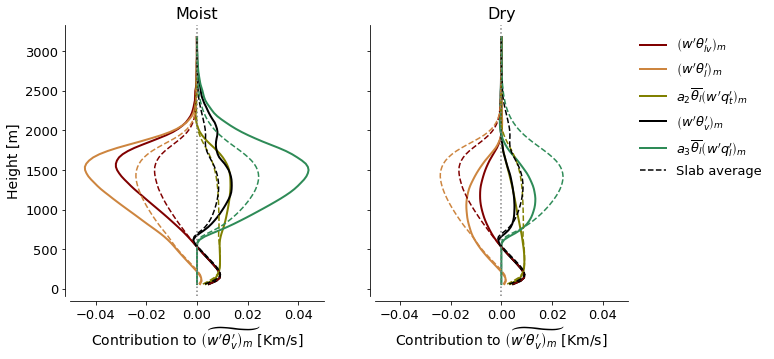

In [11]:
#%% Fluxes of wthlv

# Time to average over
tpltmin = 10.
tpltmax = 16.
dit = 1.0
dtav = 1.0 # Around each plotted time step

terms = [ r"$\left(w'\theta_{lv}'\right)_m$",
          r"$\left(w'\theta_l'\right)_m$",
          r"$a_2\overline{\theta_l}\left(w'q_t'\right)_m$",
          r"$\left(w'\theta_v'\right)_m$",
          r"$a_3\overline{\theta_l}\left(w'q_l'\right)_m$",
         ]

colors = ['maroon',
          'peru',
          'olive',
          'black',
          'seagreen',
          ]

alpha = 1.0
lw = 2
a4 = Lv/exnf/cp # a4

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1

itpltmin1d = np.where(time1d>=tpltmin*3600)[0][0]
itpltmax1d = np.where(time1d<tpltmax*3600)[0][-1]+1

idtplt = int(round(dit/(time[plttime[1]]-time[plttime[0]])))
idtav  = int(round(dtav/2/(time[1]-time[0])))
plttime_var = np.arange(itpltmin,itpltmax,idtplt) #FIXME

# Contributions to wthv
wthvpfmn_moist = np.mean(wthlvpf_moist_time[itpltmin:itpltmax,:]+
                         7*thl_av_time[itpltmin:itpltmax,:]*wqlpf_moist_time[itpltmin:itpltmax,:],axis=0)
wthvpfmn_dry = np.mean(wthlvpf_dry_time[itpltmin:itpltmax,:]+
                         7*thl_av_time[itpltmin:itpltmax,:]*wqlpf_dry_time[itpltmin:itpltmax,:],axis=0)
wthvpmn_av = np.mean(dl.load_wthvrav(izmin, izmax)[itpltmin1d:itpltmax1d,:],axis=0)

wthlvpfmn_moist = np.mean(wthlvpf_moist_time[itpltmin:itpltmax,:],axis=0)
wthlvpfmn_dry = np.mean(wthlvpf_dry_time[itpltmin:itpltmax,:],axis=0)
wthlvpmn_av = np.mean(wthlvp_av_time[itpltmin:itpltmax,:],axis=0)

wthlpfmn_moist = np.mean(wthlpf_moist_time[itpltmin:itpltmax,:],axis=0)
wthlpfmn_dry = np.mean(wthlpf_dry_time[itpltmin:itpltmax,:],axis=0)
wthlpmn_av = np.mean(dl.load_wthlrav(izmin, izmax)[itpltmin1d:itpltmax1d,:],axis=0)

a2wqtpfmn_moist = np.mean(0.608*thl_av_time[itpltmin:itpltmax,:]*wqtpf_moist_time[itpltmin:itpltmax,:],axis=0)
a2wqtpfmn_dry = np.mean(0.608*thl_av_time[itpltmin:itpltmax,:]*wqtpf_dry_time[itpltmin:itpltmax,:],axis=0)
a2wqtpmn_av = np.mean(0.608*thl_av_1d[itpltmin1d:itpltmax1d,:]*dl.load_wqtrav(izmin,izmax)[itpltmin1d:itpltmax1d,:],axis=0)

a3wqlpfmn_moist = np.mean(7*thl_av_time[itpltmin:itpltmax,:]*wqlpf_moist_time[itpltmin:itpltmax,:],axis=0)
a3wqlpfmn_dry = np.mean(7*thl_av_time[itpltmin:itpltmax,:]*wqlpf_dry_time[itpltmin:itpltmax,:],axis=0)
a3wqlpmn_av = np.mean(7*thl_av_1d[itpltmin1d:itpltmax1d,:]*dl.load_wqlrav(izmin,izmax)[itpltmin1d:itpltmax1d,:],axis=0)

# wthvpf plot
fig,axs = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(10,5), squeeze=False)
axs[0,0].plot(wthlvpfmn_moist, zflim,c=colors[0],alpha=alpha,lw=lw)
axs[0,0].plot(wthlpfmn_moist, zflim,c=colors[1],alpha=alpha,lw=lw)
axs[0,0].plot(a2wqtpfmn_moist, zflim,c=colors[2],alpha=alpha,lw=lw)
axs[0,0].plot(wthvpfmn_moist, zflim,c=colors[3],alpha=alpha,lw=lw)
axs[0,0].plot(a3wqlpfmn_moist, zflim,c=colors[4],alpha=alpha,lw=lw)
axs[0,0].plot(wthlvpmn_av, zflim,c=colors[0],alpha=alpha,lw=lw-0.5,linestyle='--')
axs[0,0].plot(wthlpmn_av, zflim,c=colors[1],alpha=alpha,lw=lw-0.5,linestyle='--')
axs[0,0].plot(a2wqtpmn_av, zflim,c=colors[2],alpha=alpha,lw=lw-0.5,linestyle='--')
axs[0,0].plot(wthvpmn_av, zflim,c=colors[3],alpha=alpha,lw=lw-0.5,linestyle='--')
axs[0,0].plot(a3wqlpmn_av, zflim,c=colors[4],alpha=alpha,lw=lw-0.5,linestyle='--')
axs[0,0].set_xlabel(r"Contribution to $\widetilde{\left(w'\theta_{v}'\right)_m}$ [Km/s]")
axs[0,0].set_ylabel(r'Height [m]')
axs[0,0].axvline(0,color='gray',linestyle='dotted')
axs[0,0].set_xlim((-0.05,0.05))
axs[0,0].set_title('Moist')

axs[0,1].plot(wthlvpfmn_dry, zflim,c=colors[0],alpha=alpha,lw=lw,label=terms[0])
axs[0,1].plot(wthlpfmn_dry, zflim,c=colors[1],alpha=alpha,lw=lw,label=terms[1])
axs[0,1].plot(a2wqtpfmn_dry, zflim,c=colors[2],alpha=alpha,lw=lw,label=terms[2])
axs[0,1].plot(wthvpfmn_dry, zflim,c=colors[3],alpha=alpha,lw=lw,label=terms[3])
axs[0,1].plot(a3wqlpfmn_dry, zflim,c=colors[4],alpha=alpha,lw=lw,label=terms[4])
axs[0,1].plot(wthlvpmn_av, zflim,c=colors[0],alpha=alpha,lw=lw-0.5,linestyle='--')
axs[0,1].plot(wthlpmn_av, zflim,c=colors[1],alpha=alpha,lw=lw-0.5,linestyle='--')
axs[0,1].plot(a2wqtpmn_av, zflim,c=colors[2],alpha=alpha,lw=lw-0.5,linestyle='--')
axs[0,1].plot(wthvpmn_av, zflim,c=colors[3],alpha=alpha,lw=lw-0.5,linestyle='--',label='Slab average')
axs[0,1].plot(a3wqlpmn_av, zflim,c=colors[4],alpha=alpha,lw=lw-0.5,linestyle='--')
axs[0,1].set_xlabel(r"Contribution to $\widetilde{\left(w'\theta_{v}'\right)_m}$ [Km/s]")
axs[0,1].axvline(0,color='gray',linestyle='dotted')
axs[0,1].set_xlim((-0.05,0.05))
axs[0,1].set_title('Dry')
axs[0,1].legend(bbox_to_anchor=(1,1),loc='upper left', frameon=False)
sns.despine(offset=5)
plt.savefig(sp+'/wthv_decomposition.pdf',bbox_inches='tight')

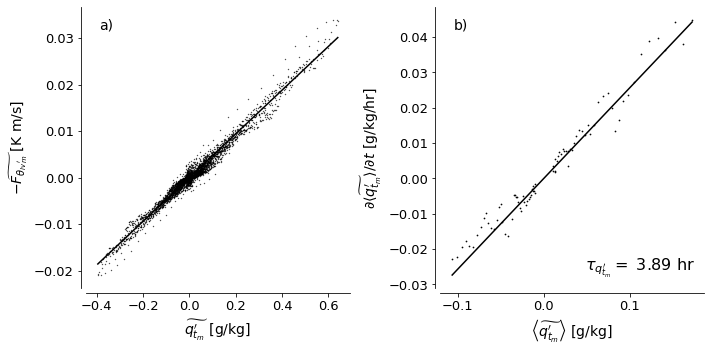

In [12]:
#%% Relation qtpf - wthlvpf_anom

tpltmin = 6.
tpltmax = 16.
C = 0.3 # Constant of proportionality
fs = 14 # fontsize
fqtp = 1000*3600 # kg/kg/s => g/kg/hr
fqt = 1000 # kg/kg => g/kg

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1
plttime_plt = np.arange(itpltmax-itpltmin)

itpltmin1d = np.where(time1d/3600>=tpltmin)[0][0]
itpltmax1d = np.where(time1d/3600<tpltmax)[0][-1]+1

# Calculate wstar from data
zwmax = 500
izwmax = np.where(zflim>zwmax)[0][0]
w2 = dl.load_w2tav(izmin, izmax)
wstar = np.sqrt(np.mean(w2[:,:izwmax]))

# gammas
Gamrat = Gamma_qt/Gamma_thlv
Gamratz = (Gamrat[:,1:] - Gamrat[:,:-1])/(zflim[1] - zflim[0])

# Time filter
wthlvpf_moist_anom_pl = -wthlvpf_moist_anom[itpltmin:itpltmax,:]
wthlvpf_dry_anom_pl = -wthlvpf_dry_anom[itpltmin:itpltmax,:]
qtpf_moist_pl = qtpf_moist_time[itpltmin:itpltmax,:]
qtpf_dry_pl = qtpf_dry_time[itpltmin:itpltmax,:]
Gamratz_pl = np.mean(Gamratz[itpltmin:itpltmax,:],axis=0)

# Model
qtpf_mod = np.linspace(qtpf_dry_pl.min(),qtpf_moist_pl.max(),10)
wthlvpf_anom_mod = C*wstar*thl0*qtpf_mod

# Vertically integrated model
qtpfi_moist = vint(qtpf_moist_time[itpltmin:itpltmax,:],rhobfi, zflim,plttime=plttime_plt,norm=True)
wthlvpf_anomi_moist = -vint(wthlvpf_moist_anom[itpltmin:itpltmax,2:-1]*Gamratz[itpltmin:itpltmax,:],rhobfi[2:-1], zflim[2:-1], plttime=plttime_plt,norm=True)
qtpfi_dry = vint(qtpf_dry_time[itpltmin:itpltmax,:],rhobfi, zflim,plttime=plttime_plt,norm=True)
wthlvpf_anomi_dry = -vint(wthlvpf_dry_anom[itpltmin:itpltmax,2:-1]*Gamratz[itpltmin:itpltmax,:],rhobfi[2:-1], zflim[2:-1], plttime=plttime_plt,norm=True)

# Tendency
qtpfi_tend_moist = vint(qtpf_tend_moist_time[itpltmin:itpltmax,:],rhobfi[1:-1],zflim[1:-1],plttime=plttime_plt,norm=True)
qtpfi_tend_dry = vint(qtpf_tend_dry_time[itpltmin:itpltmax,:],rhobfi[1:-1],zflim[1:-1],plttime=plttime_plt,norm=True)


# Cloud layer-mean Gamratz
Gamratz_mn = np.mean(Gamratz_pl[20:40])
qtpfi_mod = np.linspace(qtpfi_dry.min(),qtpfi_moist.max(),10)
tau = 1. / (C*thl0*wstar*Gamratz_mn)
wthlvpf_anomi_mod = qtpfi_mod  / tau


fig,axs=plt.subplots(ncols=2,figsize=(10,5),squeeze=False)
axs[0,0].scatter(qtpf_moist_pl.flatten()*fqt,wthlvpf_moist_anom_pl.flatten(),c='k',s=0.1)
axs[0,0].scatter(qtpf_dry_pl.flatten()*fqt,wthlvpf_dry_anom_pl.flatten(),c='k',s=0.1)
axs[0,0].plot(qtpf_mod*fqt,wthlvpf_anom_mod,'k')
axs[0,0].set_ylabel(r"$-\widetilde{F_{{\theta_{lv}}_m'}}$ [K m/s]")
axs[0,0].set_xlabel(r"$\widetilde{q_{t_m}'}$ [g/kg]",fontsize=fs)
axs[0,0].annotate('a)', (0.05,0.92), xycoords='axes fraction', fontsize=14)

axs[0,1].scatter(qtpfi_moist*fqt,qtpfi_tend_moist*fqtp,c='k',s=0.5)
axs[0,1].scatter(qtpfi_dry*fqt,qtpfi_tend_dry*fqtp,c='k',s=0.5)
axs[0,1].plot(qtpfi_mod*fqt,wthlvpf_anomi_mod*fqtp,'k')
axs[0,1].set_ylabel(r"$\partial \langle \widetilde{q_{t_m}'} \rangle /\partial t$ [g/kg/hr]")
axs[0,1].set_xlabel(r"$\left\langle \widetilde{q_{t_m}'}\right\rangle$ [g/kg]")
axs[0,1].annotate(r"$\tau_{q_{t_m}'} =$ %.2f hr"%(tau/3600), (0.55,0.06), xycoords='axes fraction', fontsize=16)
axs[0,1].annotate('b)', (0.05,0.92), xycoords='axes fraction', fontsize=14)
plt.tight_layout()
sns.despine(offset=5)
plt.savefig(sp+'/qtpf_qtpfprod_model.png',dpi=300,bbox_inches='tight')
plt.show()


/Users/martinjanssens/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/martinjanssens/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


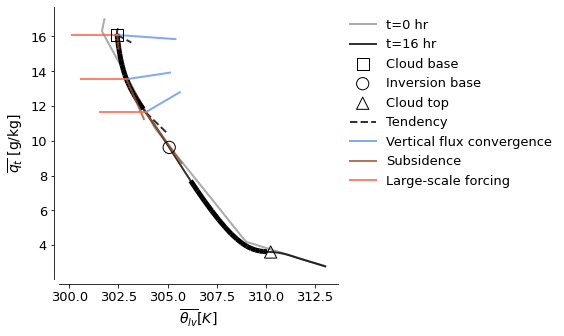

In [13]:
#%% Paluch diagram

tpltmin = 1.0
tpltmax = 31.
dit = 15 # Rounds to closest multiple of dt in time
fac=1e5 # Factor for plotting tendency magnitudes
tav=2 # time (hrs) around plotting time over which to average flux divergence
lw=2
alpha=0.8
colsymb = 'black'
sizesymb = 150

terms = ['Tendency',
        'Vertical flux convergence',
        'Subsidence',
        'Large-scale forcing',
         ]

colors = ['black',
          'cornflowerblue',
          'sienna',
          'tomato',
          ]

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1
idtplt = int(round(dit/(time[plttime[1]]-time[plttime[0]])))
plttime_var = np.arange(itpltmin,itpltmax,idtplt)


cth = ds2d['cldtop'][:].data
time2d = ds2d['time'][:].data

fig = plt.figure(figsize=(5,5))
ax = plt.gca()
for i in range(len(plttime_var)):
    
    imin = np.argmin(wthlvp_av_time[plttime_var[i],:])
    ilab = r"Inversion base" if i==len(plttime_var)-1 else None

    it1d = np.argmin(np.abs(time[plttime_var[i]]-time1d/3600))
    itmin = np.argmin(np.abs(time1d - (time1d[it1d]-tav*3600)))
    itmax = np.argmin(np.abs(time1d - (time1d[it1d]+tav*3600)))
    
    iqlbase = np.where(np.abs(ql_av_1d[it1d,:]) > 0)[0][0]
    qlbaselab = r"Cloud base" if i==len(plttime_var)-1 else None
    
    iqltop = np.where(np.abs(ql_av_1d[it1d,:]) > 5e-7)[0][-1]
    if iqltop > izmax-3:
        iqltop = izmax-3

#     it2d = np.argmin(np.abs(time[plttime_var[i]]-time2d/3600))
#     ctht = cth[it2d,:,:]
#     cthav = np.mean(ctht[ctht>1000])
#     iqltop = np.argmin(np.abs(cthav - zflim))
#     print(cthav)
    
    qltoplab = r"Cloud top" if i==len(plttime_var)-1 else None
    
    # Tendency, averaged over tav around the current time
    ddt_thlv_av = np.mean(ddt_thlv_av_time[itmin:itmax],axis=0)
    ddt_qt_av = np.mean(ddt_qt_av_time[itmin:itmax],axis=0)
    
    # Flux divergence, averaged over tav around the current time
    ddz_wthlv_av = np.mean(-ddz_wthlv_av_time[itmin:itmax],axis=0)
    ddz_wqt_av = np.mean(-ddz_wqt_av_time[itmin:itmax],axis=0)
    
    # Subsidence
    qtavp_subs = (-wfls[izmin+1:izmax-1]*Gamma_qt[plttime_var[i],:])
    thlvavp_subs = (-wfls[izmin+1:izmax-1]*Gamma_thlv[plttime_var[i],:])
    
    # Large-scale forcing
    qtavp_larg = dqdt_ls
    thlvavp_larg = 0.608*thl_av_time[plttime_var[i],:]*dqdt_ls + dthldt_ls
    
    
    col = plt.cm.Greys((i+1)/len(plttime_var))
    if i == 0:
        pinp = np.loadtxt(lp+'/../prof.inp.001')
        zinp = pinp[:,0]
        thlinp = pinp[:,1]
        qtinp = pinp[:,2]
        thlvinp = thlinp*(1+0.608*qtinp)
        ax.plot(thlvinp[zinp<zflim[-1]], qtinp[zinp<zflim[-1]]*1e3,
                label='t=%.0f hr'%0,color=col,lw=lw,alpha=alpha)
    else:
        ax.plot(thlv_av_time[plttime_var[i],:], qt_av_time[plttime_var[i],:]*1e3,
                label='t=%.0f hr'%time[plttime_var[i]],color=col,lw=lw,alpha=alpha)
    
    if i == len(plttime_var)-1:
#         heights_budg = [iqlbase, imin, iqltop-25]
#         heights_budg = np.arange(iqlbase, iqltop,10)
        heights_budg = np.arange(iqlbase, imin,10)
#         heights_budg = np.hstack((np.arange(iqlbase, imin,10),np.arange(imin, iqltop+4,10)))

        ax.scatter(thlv_av_time[plttime_var[i],iqlbase],qt_av_time[plttime_var[i],iqlbase]*1e3,
                   marker='s',color=colsymb,zorder=100,label=qlbaselab,s=sizesymb,facecolors='none')
        ax.scatter(thlv_av_time[plttime_var[i],imin],qt_av_time[plttime_var[i],imin]*1e3,
                   color=colsymb,zorder=100,label=ilab,s=sizesymb,facecolors='none')
        ax.scatter(thlv_av_time[plttime_var[i],iqltop],qt_av_time[plttime_var[i],iqltop]*1e3,
                   marker='^',color=colsymb,zorder=100,label=qltoplab,s=sizesymb, facecolors='none')
        ax.set_xlabel(r"$\overline{\theta_{lv}} [K]$")
        ax.set_ylabel(r"$\overline{q_t}$ [g/kg]")
        
        thlvz = np.diff(thlv_av_time[plttime_var[i],:])
        qtz = np.diff(qt_av_time[plttime_var[i],:])
        gamrat_z = np.diff(qtz/thlvz)
        gamrat_z[zflim[1:-1]<500] = 0
        gamrat_z[zflim[1:-1]>2500] = 0
        gamrat_z = np.pad(gamrat_z,1)
        iconvex = np.zeros(gamrat_z.shape)
        iconvex[gamrat_z>4e-5] = 5
        
        points = np.array([thlv_av_time[plttime_var[i],:], qt_av_time[plttime_var[i],:]*1e3]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segments, linewidths=iconvex,color=colors[0])
        ax.add_collection(lc)
        
        for k in range(len(heights_budg)):

            tendlab = terms[0] if k==0 else None
            fluxlab = terms[1] if k==0 else None
            subslab = terms[2] if k==0 else None  
            larglab = terms[3] if k==0 else None
                        
            ax.plot([thlv_av_time[plttime_var[i],heights_budg[k]],thlv_av_time[plttime_var[i],heights_budg[k]]+fac*ddt_thlv_av[heights_budg[k]]],
                    [qt_av_time[plttime_var[i],heights_budg[k]]*1e3,(qt_av_time[plttime_var[i],heights_budg[k]]+fac*ddt_qt_av[heights_budg[k]])*1e3],
                    color=colors[0],label=tendlab,lw=lw,alpha=alpha,linestyle='--')

            ax.plot([thlv_av_time[plttime_var[i],heights_budg[k]],thlv_av_time[plttime_var[i],heights_budg[k]]+fac*ddz_wthlv_av[heights_budg[k]]],
                    [qt_av_time[plttime_var[i],heights_budg[k]]*1e3,(qt_av_time[plttime_var[i],heights_budg[k]]+fac*ddz_wqt_av[heights_budg[k]])*1e3],
                    color=colors[1],label=fluxlab,lw=lw,alpha=alpha)

            ax.plot([thlv_av_time[plttime_var[i],heights_budg[k]],thlv_av_time[plttime_var[i],heights_budg[k]]+fac*thlvavp_subs[heights_budg[k]]],
                    [qt_av_time[plttime_var[i],heights_budg[k]]*1e3,(qt_av_time[plttime_var[i],heights_budg[k]]+fac*qtavp_subs[heights_budg[k]])*1e3],
                    color=colors[2],label=subslab,lw=lw,alpha=alpha)
            
            ax.plot([thlv_av_time[plttime_var[i],heights_budg[k]],thlv_av_time[plttime_var[i],heights_budg[k]]+fac*thlvavp_larg[heights_budg[k]]],
                    [qt_av_time[plttime_var[i],heights_budg[k]]*1e3,(qt_av_time[plttime_var[i],heights_budg[k]]+fac*qtavp_larg[heights_budg[k]])*1e3],
                    color=colors[3],label=larglab,lw=lw,alpha=alpha)
            
ax.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=len(plttime_var)//13+1, frameon=False)
sns.despine(offset=5)

plt.savefig(sp+'/conserved.pdf',bbox_inches='tight')


/Users/martinjanssens/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/Users/martinjanssens/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:112: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
/Users/martinjanssens/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:124: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following inval

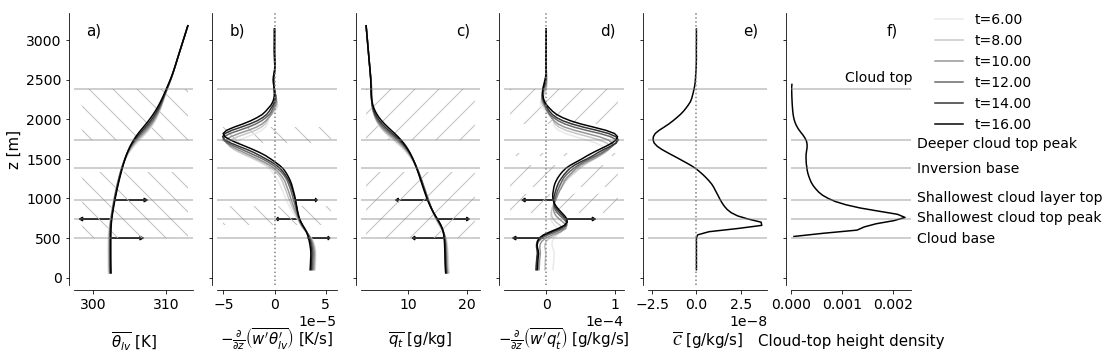

In [14]:
#%% Profiles of mean flux divergence
cth = ds2d['cldtop'][:].data

tpltmin = 6.
tpltmax = 18.
dit = 2 # Rounds to closest multiple of dt in time
tav = 1.0
alpha=0.5
fq = 1e3

# arrow settings
dx_t = 4
hlt = 0.5

dx_wt = 2e-5
hlwt = 2e-6

dx_qt = fq*5e-3
hlq = 5e-1

dx_wq = fq*4e-8
hlwq = fq*5e-9

hw = 50

# lines settings
clines = 'gray'

# Font sizes
update_fontsizes(14, 15, 16)

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1
idtplt = int(round(dit/(time[plttime[1]]-time[plttime[0]])))
plttime_var = np.arange(itpltmin,itpltmax,idtplt)

fig,axs = plt.subplots(ncols=6,sharey=True,figsize=(15,5),squeeze=False)
for i in range(len(plttime_var)):
    col = plt.cm.Greys((i+1)/len(plttime_var))
    
    itmin = np.argmin(np.abs(time1d - (time1d[plttime_var[i]]-tav*3600)))
    itmax = np.argmin(np.abs(time1d - (time1d[plttime_var[i]]+tav*3600)))
    
    # State
    thlv_av = np.mean(thlv_av_time[itmin:itmax],axis=0)
    qt_av = fq*np.mean(qt_av_time[itmin:itmax],axis=0)
    
    # Flux divergence
    ddz_wthlv_av = np.mean(ddz_wthlv_av_time[itmin:itmax],axis=0)
    ddz_wqt_av = fq*np.mean(ddz_wqt_av_time[itmin:itmax],axis=0)

    # Net condensation
    qlav_vdiv = np.mean(ddz_wql_av_time[itmin:itmax,:],axis=0) # Assuming condensation equals transport
         
    axs[0,0].plot(thlv_av, zflim, color=col,linestyle='-')
    
    axs[0,1].plot(-ddz_wthlv_av, zflim[1:-1], color=col,linestyle='-')

    axs[0,2].plot(qt_av, zflim, color=col,linestyle='-')
    
    axs[0,3].plot(-ddz_wqt_av, zflim[1:-1], color=col,linestyle='-',label='t=%.2f'%(time[plttime_var[i]]))
    
    if i == len(plttime_var) - 1:
        thlvz = np.diff(thlv_av)
        qtz = np.diff(qt_av)
        gamrat_z = np.diff(qtz/thlvz)
        gamrat_z[zflim[1:-1]<500] = 0
        gamrat_z[zflim[1:-1]>2400] = 0
        
        wthlvzz = np.diff(ddz_wthlv_av)
        wthlvzzz = np.diff(wthlvzz)
        wthlvzzz[zflim[2:-2]>2400] = 0
        wthlvzzz[zflim[2:-2]<500] = 0
        
        wqtzz = np.diff(ddz_wqt_av)
        wqtzzz = np.diff(wqtzz)
        wqtzzz[zflim[2:-2]>2400] = 0
        wqtzzz[zflim[2:-2]<580] = 0
        
        # Cloud base height
        icb = np.where(np.abs(np.mean(ql_av_1d[itmin:itmax,:],axis=0)) > 1e-9)[0][0]
        cblab = r"Cloud base"
        
        # Transition layer top (Fixed at 700m FIXME update with ALA's functions)
        itr = np.argmin(np.abs(zflim - 740))
        trlab = r"Shallowest cloud top peak"
        
        # Top of the layer populated by shallowest clouds (Fixed at 1000m)
        ish = np.argmin(np.abs(zflim - 1000))
        shlab = r"Shallowest cloud layer top"
        
        # Inversion base
        iib = np.argmin(np.abs(zflim - 1400))
        iblab = r"Inversion base"
        
        # Peak of cloud-top height of deeper clouds
        ict = np.argmin(np.abs(zflim - 1750))
        ctlab = r"Deeper cloud top peak"

        # Top of inversion
        iit = np.argmin(np.abs(zflim - 2400))
        itlab = r"Cloud top"
        
        axs[0,0].arrow(thlv_av[icb],zflim[icb],  dx_t, 0., head_width=hw, head_length=hlt, fc='k', ec='k')
        axs[0,0].arrow(thlv_av[itr],zflim[itr], -dx_t, 0., head_width=hw, head_length=hlt, fc='k', ec='k')
        axs[0,0].arrow(thlv_av[ish],zflim[ish],  dx_t, 0., head_width=hw, head_length=hlt, fc='k', ec='k')
        axs[0,0].fill_betweenx(zflim[1:-1], thlv_av.min()-dx_t, thlv_av.max(),
                               where=(gamrat_z>0),
                               facecolor='none',
                               edgecolor='silver',
                               hatch=r"\ ",
                               linewidth=0.0)
        axs[0,0].annotate('a)', (0.1,0.92), xycoords='axes fraction', fontsize=15)
        axs[0,0].set_xlabel(r"$\overline{\theta_{lv}}$ [K]", labelpad=19)
        
        axs[0,1].arrow(-ddz_wthlv_av[icb],zflim[icb],  dx_wt, 0., head_width=hw, head_length=hlwt, fc='k', ec='k')
        axs[0,1].arrow(-ddz_wthlv_av[itr],zflim[itr], -dx_wt, 0., head_width=hw, head_length=hlwt, fc='k', ec='k')
        axs[0,1].arrow(-ddz_wthlv_av[ish],zflim[ish],  dx_wt, 0., head_width=hw, head_length=hlwt, fc='k', ec='k')
        axs[0,1].fill_betweenx(zflim[2:-2], -ddz_wthlv_av.min()+dx_wt, -ddz_wthlv_av.max(),
                               where=(wthlvzzz<-1e-9),
                               facecolor='none',
                               edgecolor='silver',
                               hatch=r"\ ",
                               linewidth=0.0)
        axs[0,1].annotate('b)', (0.1,0.92), xycoords='axes fraction', fontsize=15)
        axs[0,1].axvline(0,color='gray',linestyle='dotted')
        axs[0,1].set_xlabel(r"$-\frac{\partial}{\partial z}\left(\overline{w'\theta_{lv}'}\right)$ [K/s]", labelpad=15)
        axs[0,1].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        
        axs[0,2].arrow(qt_av[icb],zflim[icb], -dx_qt, 0., head_width=hw, head_length=hlq, fc='k', ec='k')
        axs[0,2].arrow(qt_av[itr],zflim[itr],  dx_qt, 0., head_width=hw, head_length=hlq, fc='k', ec='k')
        axs[0,2].arrow(qt_av[ish],zflim[ish], -dx_qt, 0., head_width=hw, head_length=hlq, fc='k', ec='k')
        axs[0,2].fill_betweenx(zflim[1:-1], qt_av.min(), qt_av.max()+dx_qt,
                               where=(gamrat_z>0),
                               facecolor='none',
                               edgecolor='silver',
                               hatch=r"/",
                               linewidth=0.0)
        axs[0,2].annotate('c)', (0.8,0.92), xycoords='axes fraction', fontsize=15)
        axs[0,2].set_xlabel(r"$\overline{q_t}$ [g/kg]", labelpad=19)

        axs[0,3].arrow(-ddz_wqt_av[icb],zflim[icb], -dx_wq, 0., head_width=hw, head_length=hlwq, fc='k', ec='k')
        axs[0,3].arrow(-ddz_wqt_av[itr],zflim[itr],  dx_wq, 0., head_width=hw, head_length=hlwq, fc='k', ec='k')
        axs[0,3].arrow(-ddz_wqt_av[ish],zflim[ish], -dx_wq, 0., head_width=hw, head_length=hlwq, fc='k', ec='k')
        axs[0,3].fill_betweenx(zflim[2:-2], -ddz_wqt_av.min(), -ddz_wqt_av.max()-dx_wq,
                               where=(wqtzzz<0),
                               facecolor='none',
                               edgecolor='silver',
                               hatch=r"/",
                               linewidth=0.0)
        axs[0,3].annotate('d)', (0.8,0.92), xycoords='axes fraction', fontsize=15)
        axs[0,3].axvline(0,color='gray',linestyle='dotted')
        axs[0,3].set_xlabel(r"$-\frac{\partial}{\partial z}\left(\overline{w'q_t'}\right)$ [g/kg/s]", labelpad=15)
        axs[0,3].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        
        axs[0,4].plot(qlav_vdiv, zflim[1:-1], color=col,linestyle='-',label='t=%.2f'%(time[plttime_var[i]]))
        axs[0,4].axvline(0,color='gray',linestyle='dotted')
        axs[0,4].set_xlabel(r"$\overline{\mathcal{C}}$ [g/kg/s]", labelpad = 19)
        axs[0,4].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        axs[0,4].annotate('e)', (0.8,0.92), xycoords='axes fraction', fontsize=15)
        
        axs[0,5] = sns.histplot(y=cth[cth>0],bins=np.arange(500,2500,40),
                                element="poly", fill=False,stat='density',
                                color='k',ax=axs[0,5])
        axs[0,5].set_xlabel('Cloud-top height density', labelpad=22)
        axs[0,5].annotate('f)', (0.8,0.92), xycoords='axes fraction', fontsize=15)
        
        for j in range(axs.shape[1]):
            axs[0,j].axhline(zflim[icb], c=clines, alpha=0.5)
            axs[0,j].axhline(zflim[itr], c=clines, alpha=0.5)
            axs[0,j].axhline(zflim[ish], c=clines, alpha=0.5)
            axs[0,j].axhline(zflim[iib], c=clines, alpha=0.5)
            axs[0,j].axhline(zflim[ict], c=clines, alpha=0.5)
            axs[0,j].axhline(zflim[iit], c=clines, alpha=0.5)
            
            if j == axs.shape[1]-1:
                axs[0,j].annotate(cblab, (1.05,zflim[icb]/zflim.max()), xycoords='axes fraction')
                axs[0,j].annotate(trlab, (1.05,zflim[itr]/zflim.max()), xycoords='axes fraction')
                axs[0,j].annotate(shlab, (1.05,zflim[ish]/zflim.max()), xycoords='axes fraction')
                axs[0,j].annotate(iblab, (1.05,zflim[iib]/zflim.max()-0.02), xycoords='axes fraction')
                axs[0,j].annotate(ctlab, (1.05,zflim[ict]/zflim.max()-0.04), xycoords='axes fraction')
                axs[0,j].annotate(itlab, (0.45,zflim[iit]/zflim.max()), xycoords='axes fraction')
            
axs[0,0].set_ylabel('z [m]')
axs[0,3].legend(loc='upper left',bbox_to_anchor=(3.5,1.05),ncol=len(plttime_var)//13+1, frameon=False)
sns.despine(offset=5)
plt.savefig(sp+'/convexity.pdf',bbox_inches='tight')
update_fontsizes(small_font, mediu_font, large_font)